In [348]:
import sys
print(sys.prefix)

c:\Users\jackk\Anaconda3


In [349]:
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
import matplotlib as mpl
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator
from IPython.display import Image, display
from tensorflow.keras.layers import LSTM, Dense, Dropout, LeakyReLU, Masking
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

import tensorflow as tf

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [350]:
import imblearn

In [351]:
heineken_data = pd.read_csv(r"C:\Users\jackk\OneDrive\Desktop\data science\heineken extended research project\data\Stop Data 3 Year.csv", parse_dates = ["Date Logged", "Time Logged"])

In [352]:
heineken_data

,Index,Time Logged,Date Logged,Shift,Incident,Machine,Area / Cause,Reason / Fault,Time (minutes),Comments,Line No,MachineStopType
0,755238,1899-12-30 00:06:00.000,2021-04-30,Strongbow/Yellow,Machine Stop,Automatic lid feeder,Multi-feeder,Jammed Ends,6.0,MB Jammed ends in the rejector unit.,17,Short Stop
1,755242,1899-12-30 00:17:00.000,2021-04-30,Strongbow/Yellow,Machine Stop,Conveyors: Empty can conveyors,VTU to air ioniser,Can jammed,2.0,MB Can jammed on upper air conveyors.,17,Short Stop
2,755243,1899-12-30 00:21:00.000,2021-04-30,Strongbow/Yellow,Machine Stop,Green Grip,carton pick and place,Robot 1 - cards not placed correctly,10.0,MB Card head press out of alignment.,17,Short Stop
3,755250,1899-12-30 00:33:00.000,2021-04-30,Strongbow/Yellow,Machine Stop,Green Grip,carton pick and place,Robot 1 - cards not placed correctly,8.0,MB Card head press out of alignment.,17,Short Stop
4,755258,1899-12-30 00:45:00.000,2021-04-30,Strongbow/Yellow,Machine Stop,Green Grip,Diverter conveyor and outfeed,Pack crash at outfeed,27.0,MB Pack crashes on outfeed A and pickup issues...,17,Short Stop
...,...,...,...,...,...,...,...,...,...,...,...,...
105115,967373,1899-12-30 07:47:00.000,2024-04-29,Fosters/Green,Machine Stop,Conveyors: Empty can conveyors,Filler Infeed,Can jammed,3.0,Can jammed Lid 15 TD,18,Short Stop
105116,967376,1899-12-30 08:04:00.000,2024-04-29,Fosters/Green,Machine Stop,Conveyors: Empty can conveyors,VTU to air ioniser,Can jammed,3.0,Can jammed Lid 16 TD,18,Short Stop
105117,967379,1899-12-30 08:13:00.000,2024-04-29,Fosters/Green,Machine Stop,Seamer,Discharge rail,Seamer crash,6.0,damaged / gapping cans caused crash TD,18,Short Stop
105118,967381,1899-12-30 08:19:00.000,2024-04-29,Fosters/Green,Machine Stop,De-palletiser,Top frame removal assembly,Dropped top frame,10.0,Top frame snapped TD,18,Short Stop


# check to see if the data we are working with is balanced

In [353]:
heineken_data["Incident"].value_counts()

Incident
Machine Stop                96966
Planned Stop                 2037
Changeover                   1879
Speed loss                   1567
External Stop                1528
NONA                          639
Non Operator Maintenance      504
Name: count, dtype: int64

In [354]:
depalletiser_data = heineken_data[heineken_data["Machine"] == "De-palletiser"]

In [355]:
depalletiser_data["Incident"].value_counts()

Incident
Machine Stop    3925
Speed loss        25
Name: count, dtype: int64

In [356]:
# this shows that the depalletiser data has heavy imbalances and therefore require a way to balance the imbalanced dataset

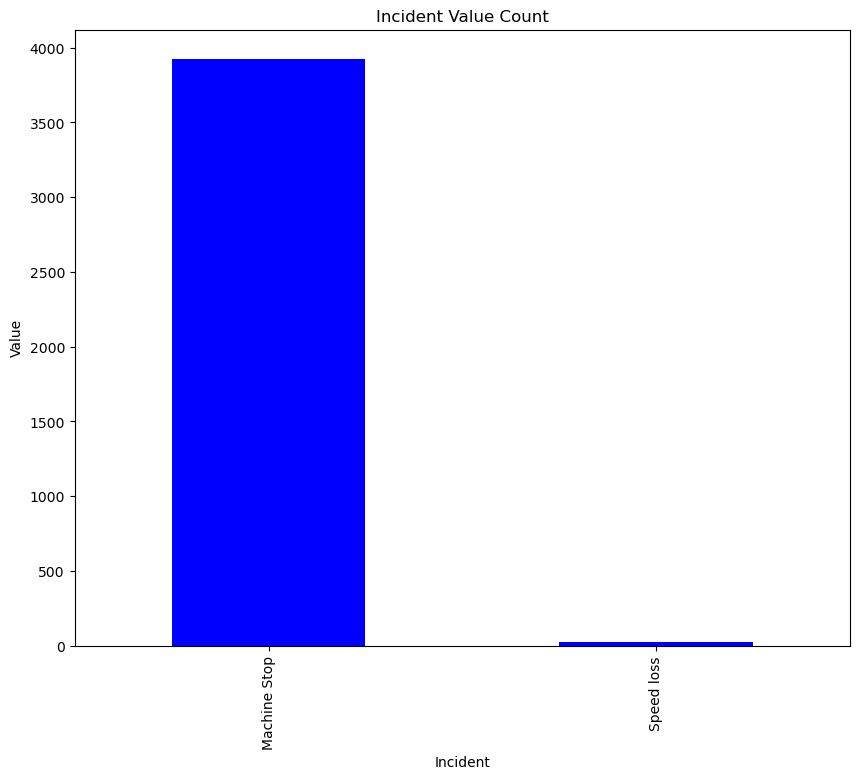

In [357]:
incident_counts = depalletiser_data['Incident'].value_counts()

incident_counts.plot(kind='bar', color='blue')

plt.title("Incident Value Count")
plt.xlabel("Incident")
plt.ylabel("Value")

plt.show()

## primary exploratory data analysis

In [358]:
heineken_data.describe()

,Index,Date Logged,Time (minutes),Line No
count,105120.000000,105120,105118.000000,105120.000000
mean,857708.357858,2022-10-05 00:21:39.452054528,18.334101,17.538794
min,755236.000000,2021-04-30 00:00:00,0.000000,17.000000
25%,805669.750000,2022-01-03 00:00:00,4.000000,17.000000
50%,854589.500000,2022-09-11 00:00:00,6.000000,18.000000
75%,910919.500000,2023-07-14 00:00:00,12.000000,18.000000
max,967385.000000,2024-04-29 00:00:00,1440.000000,18.000000
std,60915.296211,NaN,71.574095,0.498495


In [359]:
heineken_data.count()
    

Index              105120
Time Logged        105116
Date Logged        105120
Shift              105120
Incident           105120
Machine            100026
Area / Cause       103224
Reason / Fault      99823
Time (minutes)     105118
Comments            77784
Line No            105120
MachineStopType     96966
dtype: int64

# first, I inspect the nature of each column

### time logged column

In [360]:
# time logged
# the first thing I have to do is convert the time logged into a relevant datetime format, that does not have 1899 but rather just the time of day
# after converting the time logged into a datetime format, I also want to check how often the machine fails on average. This can be done by creating a new column called "time between failure" and plotting a univariate kde plot or histogram

heineken_data["Time Logged"]

0         1899-12-30 00:06:00.000
1         1899-12-30 00:17:00.000
2         1899-12-30 00:21:00.000
3         1899-12-30 00:33:00.000
4         1899-12-30 00:45:00.000
                   ...           
105115    1899-12-30 07:47:00.000
105116    1899-12-30 08:04:00.000
105117    1899-12-30 08:13:00.000
105118    1899-12-30 08:19:00.000
105119    1899-12-30 08:29:00.000
Name: Time Logged, Length: 105120, dtype: object

In [361]:

heineken_data["Time Logged"].describe()

count                      105116
unique                       1441
top       1899-12-30 07:00:00.000
freq                          921
Name: Time Logged, dtype: object

### Date logged column

In [362]:

heineken_data["Date Logged"]

0        2021-04-30
1        2021-04-30
2        2021-04-30
3        2021-04-30
4        2021-04-30
            ...    
105115   2024-04-29
105116   2024-04-29
105117   2024-04-29
105118   2024-04-29
105119   2024-04-29
Name: Date Logged, Length: 105120, dtype: datetime64[ns]

In [363]:

heineken_data["Date Logged"].describe()

count                           105120
mean     2022-10-05 00:21:39.452054528
min                2021-04-30 00:00:00
25%                2022-01-03 00:00:00
50%                2022-09-11 00:00:00
75%                2023-07-14 00:00:00
max                2024-04-29 00:00:00
Name: Date Logged, dtype: object

In [364]:

column_type = heineken_data["Date Logged"].dtype
print(column_type)

datetime64[ns]


In [365]:
# this date logged column spans for 3 years. 
# this date logged column also is in datetime64 format which can be useful for extracting seasonality

### shift

In [366]:
heineken_data["Shift"].describe()

count            105120
unique                5
top       Fosters/Green
freq              30625
Name: Shift, dtype: object

In [367]:
heineken_data["Shift"].value_counts()

Shift
Fosters/Green         30625
Heineken/Orange       25917
John Smiths/Pink      23259
Strongbow/Yellow      22874
John Smiths/Yellow     2445
Name: count, dtype: int64

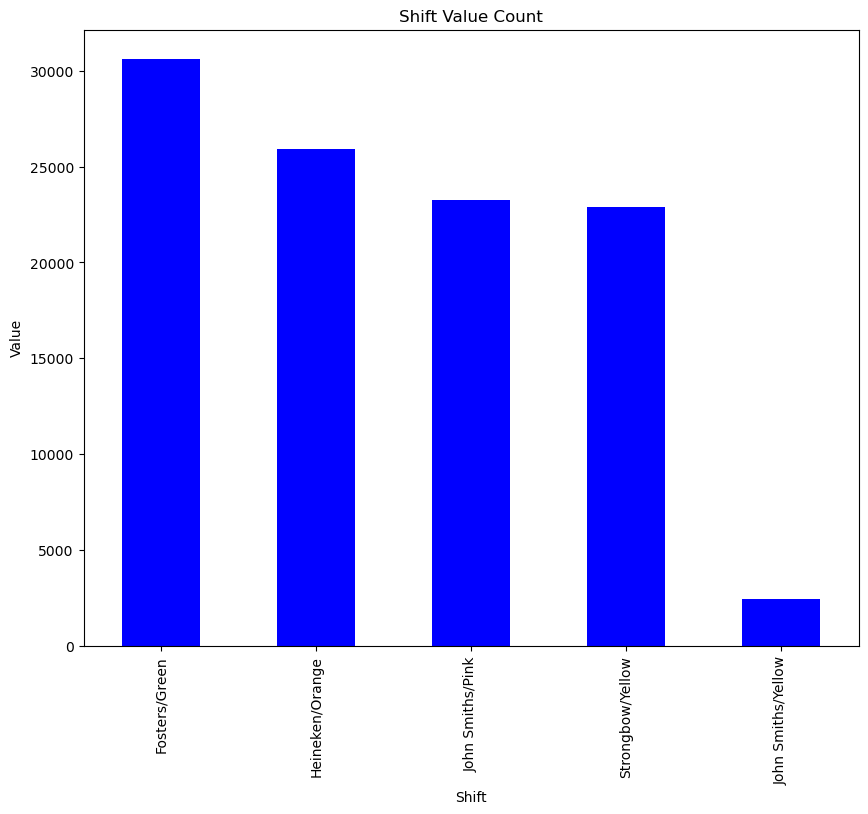

In [368]:
# create a boxplot to visualise the number of shifts each can category has


shift_counts = heineken_data['Shift'].value_counts()

shift_counts.plot(kind='bar', color='blue')

plt.title("Shift Value Count")
plt.xlabel("Shift")
plt.ylabel("Value")

plt.show()

### Incident

In [369]:
heineken_data["Incident"].describe()

count           105120
unique               7
top       Machine Stop
freq             96966
Name: Incident, dtype: object

In [370]:
heineken_data["Incident"].value_counts()

Incident
Machine Stop                96966
Planned Stop                 2037
Changeover                   1879
Speed loss                   1567
External Stop                1528
NONA                          639
Non Operator Maintenance      504
Name: count, dtype: int64

In [371]:
heineken_data[heineken_data["Incident"] == "NONA"]["Area / Cause"].unique()

array(['No customer demand',
       'Planned team meeting (Team Talk, SOTN, etc.)'], dtype=object)

In [372]:
## important

### machine stop accounts for the majority of the incidents that cause the machine to stop, this is quite vague 
### however, we can also see that there are different types of stoppages. I think it is appropriate the group planned stop, changeover, non operator maintenance 
### speed loss is a separate incident where the machine slows down due to issues such as machinery wear, reducing efficiency. This leads to decreased output etc. 
### there is also NONA, not sure what its an abbreviation for, but it shows that the machine stops due to "no customer demand and planned meetings, this is an interesting insight to look further into"
### lastly, there is external stop 

### can see here that the dataset is extremely imbalanced

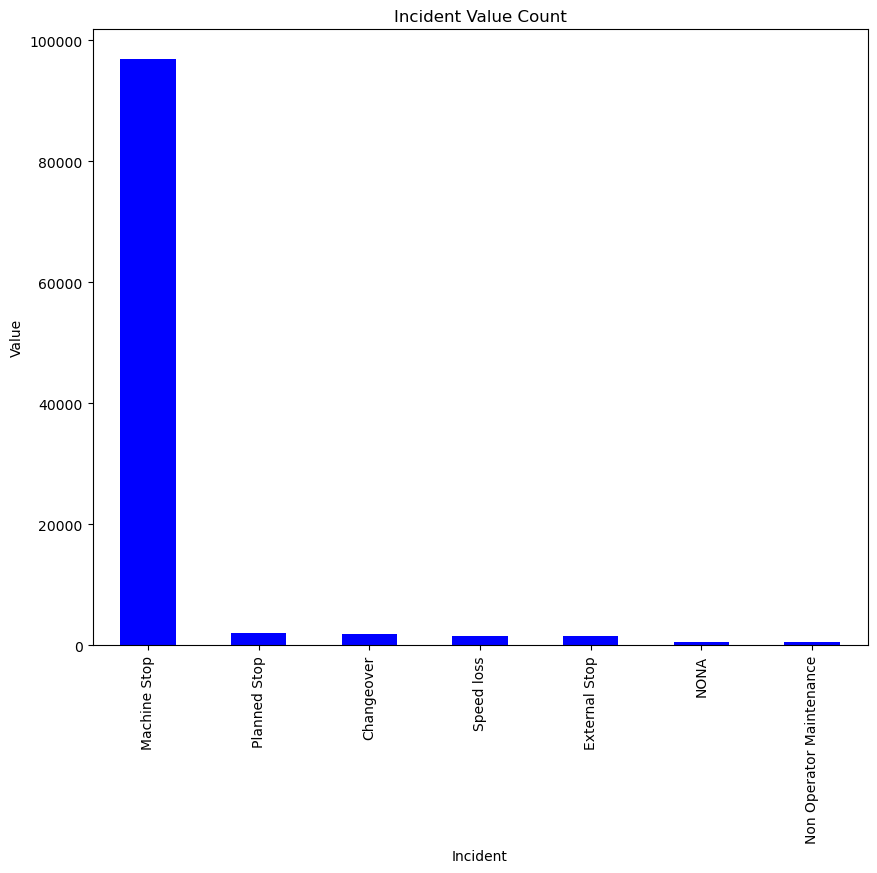

In [373]:
incident_counts = heineken_data['Incident'].value_counts()

incident_counts.plot(kind='bar', color='blue')

plt.title("Incident Value Count")
plt.xlabel("Incident")
plt.ylabel("Value")

plt.show()

In [374]:
# exploring NONA further
heineken_data[heineken_data["Machine"].isna()]["Incident"].value_counts()

# based on the previous code, I know that when there is a meeting or when there is no customer demand, it isnt specific to a machine but rather the entire factory shuts down. Might need to doublecheck with jack farr




Incident
Planned Stop                2037
Changeover                  1879
NONA                         639
Non Operator Maintenance     504
Machine Stop                  35
Name: count, dtype: int64

In [375]:
# I can investigate the times when there are no customer demand and maybe create a column from there

# one thing to note is that NONA will be global across machines, and therefore it will not appear in the depalletiser data when i specifically work with that machine
# therefore, I could possibly combine the output from NONA with the timestamp outputs from depalletiser data as well and see if it works


heineken_data[heineken_data["Incident"] == "NONA"]["Area / Cause"].value_counts()

Area / Cause
No customer demand                              615
Planned team meeting (Team Talk, SOTN, etc.)     24
Name: count, dtype: int64

### machine

In [376]:
heineken_data["Machine"].describe()

count                              100026
unique                                 61
top       Conveyors:  Empty can conveyors
freq                                20765
Name: Machine, dtype: object

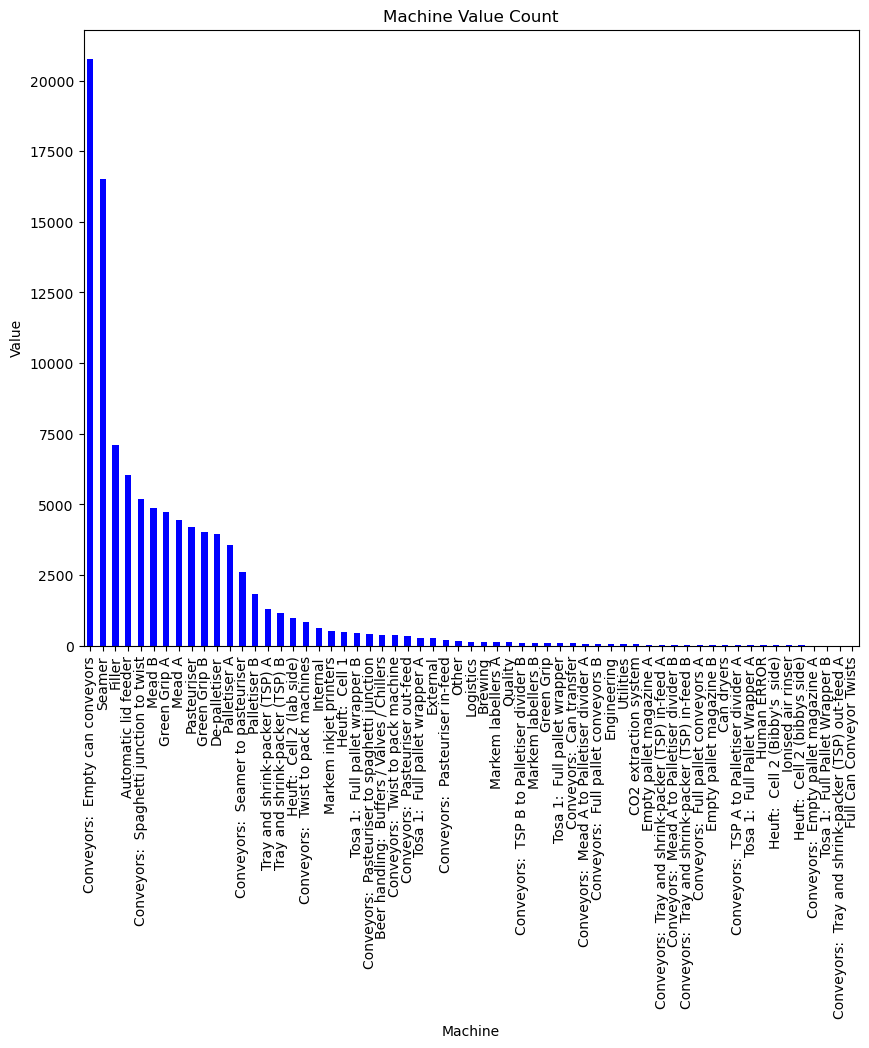

In [377]:
Machine_counts = heineken_data['Machine'].value_counts()

Machine_counts.plot(kind='bar', color='blue')

plt.title("Machine Value Count")
plt.xlabel("Machine")
plt.ylabel("Value")

plt.show()


# the top machines that breakdown are conveyors, seamer , filler etc etc

#### pareto analysis on this bar chart alone

In [378]:
# based on this graph, we can see that most of the machine contribute very little to the machine stopping. 

# i'd say up to palletiser, these machines account for 80 percent of the machines stopping

# from this pareto analysis graph we can see that 

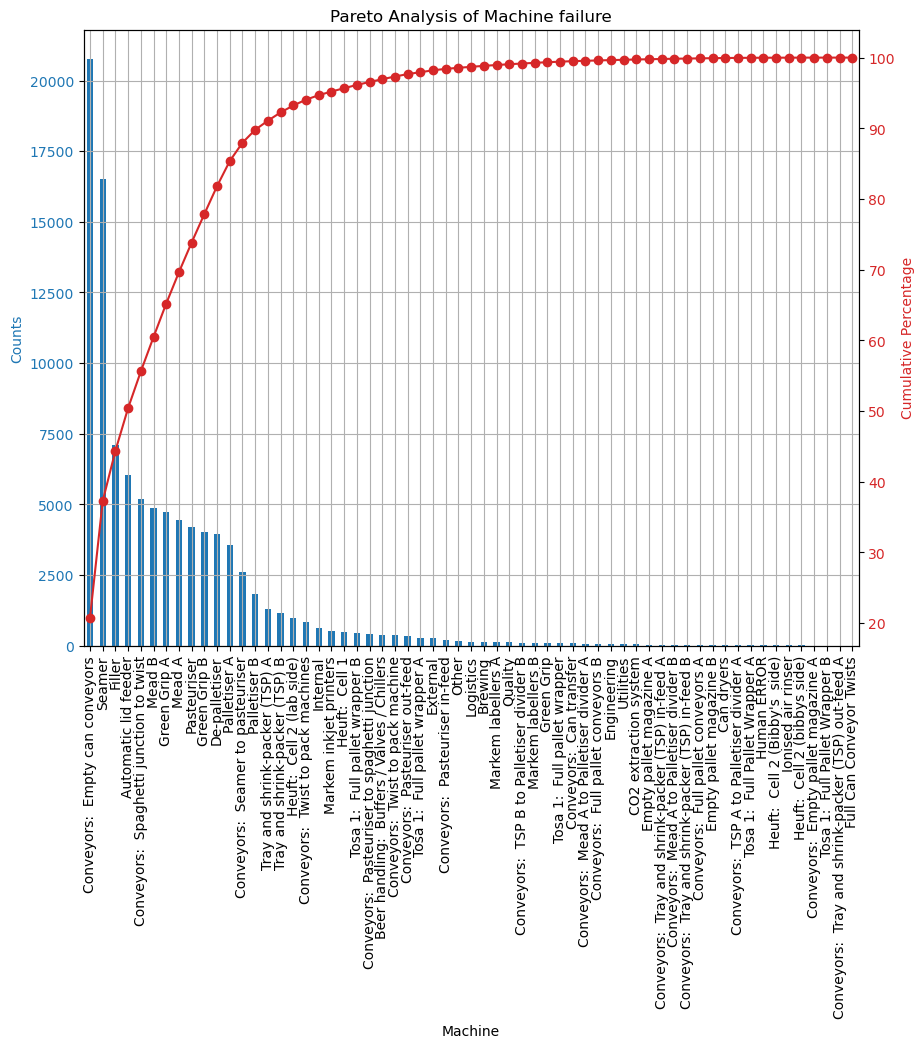

In [379]:
# pareto analysis is used to inform which machine contribute to 80 percent of all machine incidents

# Create a DataFrame to manipulate the data easily
df = pd.DataFrame({'Counts': Machine_counts})

# Calculate the cumulative sum of counts and the cumulative percentage
df['Cumulative Counts'] = df['Counts'].cumsum()
df['Cumulative Percentage'] = df['Cumulative Counts'] / df['Counts'].sum() * 100

# Plotting the counts
fig, ax1 = plt.subplots()

color = 'tab:blue'
df['Counts'].plot(kind='bar', color=color, ax=ax1)
ax1.set_xlabel('Machine')
ax1.set_ylabel('Counts', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Plotting the cumulative percentage on a secondary y-axis
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Cumulative Percentage', color=color)  # we already handled the x-label with ax1
df['Cumulative Percentage'].plot(kind='line', marker='o', color=color, ax=ax2)
ax2.tick_params(axis='y', labelcolor=color)

# Adding title and customizing grid
plt.title('Pareto Analysis of Machine failure')
ax1.grid(True)

# Show the plot
plt.show()

### area / cause and reason / fault and comments

In [380]:
## area / cause describes the area / specific part that caused the machine incident

heineken_data["Area / Cause"].describe()

count                 103224
unique                   350
top       VTU to air ioniser
freq                   13069
Name: Area / Cause, dtype: object

In [381]:
# this data seems fairly useless for time series analysis, however, it will be useful when I do NLP extraction

In [382]:
#same with reason /fault, useless now, but useful in NLP


heineken_data["Reason / Fault"].describe()

count                99823
unique                 512
top       Fault not listed
freq                 22040
Name: Reason / Fault, dtype: object

In [383]:
# same with comments , this is very unstructured as its manually inputted, tehrefore NLP will be very valuable here


heineken_data["Comments"].describe()

count           77784
unique          44148
top       fallen cans
freq             1416
Name: Comments, dtype: object

### Time (minutes)


In [384]:
# this column is important


heineken_data["Time (minutes)"].describe()

count    105118.000000
mean         18.334101
std          71.574095
min           0.000000
25%           4.000000
50%           6.000000
75%          12.000000
max        1440.000000
Name: Time (minutes), dtype: float64

In [385]:

heineken_data["Time (minutes)"]

0           6.0
1           2.0
2          10.0
3           8.0
4          27.0
          ...  
105115      3.0
105116      3.0
105117      6.0
105118     10.0
105119    125.0
Name: Time (minutes), Length: 105120, dtype: float64

In [386]:
# some stats:
# the average time that a machine stops is 18.3 minutes
# the standard deviation is 71.57

# however, we will have to redo this specifically for specific machines as these will differ

In [387]:
import pandas as pd



# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = heineken_data["Time (minutes)"].quantile(0.25)
Q3 = heineken_data["Time (minutes)"].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = heineken_data[(heineken_data["Time (minutes)"] < lower_bound) | (heineken_data["Time (minutes)"] > upper_bound)]

print("Outliers using IQR method:")
print(outliers)


Outliers using IQR method:
         Index              Time Logged Date Logged             Shift  \
4       755258  1899-12-30 00:45:00.000  2021-04-30  Strongbow/Yellow   
14      755289  1899-12-30 03:05:00.000  2021-04-30  Strongbow/Yellow   
22      755311  1899-12-30 05:36:00.000  2021-04-30  Strongbow/Yellow   
23      755331  1899-12-30 07:03:00.000  2021-04-30  John Smiths/Pink   
26      755354  1899-12-30 10:00:00.000  2021-04-30  John Smiths/Pink   
...        ...                      ...         ...               ...   
104975  966960  1899-12-30 11:20:00.000  2024-04-27  Strongbow/Yellow   
104977  966967  1899-12-30 12:21:00.000  2024-04-27  Strongbow/Yellow   
104982  966999  1899-12-30 17:04:00.000  2024-04-27  Strongbow/Yellow   
105088  967289  1899-12-30 22:35:00.000  2024-04-28  Strongbow/Yellow   
105119  967385  1899-12-30 08:29:00.000  2024-04-29     Fosters/Green   

            Incident                         Machine  \
4       Machine Stop                    

In [388]:
heineken_data

,Index,Time Logged,Date Logged,Shift,Incident,Machine,Area / Cause,Reason / Fault,Time (minutes),Comments,Line No,MachineStopType
0,755238,1899-12-30 00:06:00.000,2021-04-30,Strongbow/Yellow,Machine Stop,Automatic lid feeder,Multi-feeder,Jammed Ends,6.0,MB Jammed ends in the rejector unit.,17,Short Stop
1,755242,1899-12-30 00:17:00.000,2021-04-30,Strongbow/Yellow,Machine Stop,Conveyors: Empty can conveyors,VTU to air ioniser,Can jammed,2.0,MB Can jammed on upper air conveyors.,17,Short Stop
2,755243,1899-12-30 00:21:00.000,2021-04-30,Strongbow/Yellow,Machine Stop,Green Grip,carton pick and place,Robot 1 - cards not placed correctly,10.0,MB Card head press out of alignment.,17,Short Stop
3,755250,1899-12-30 00:33:00.000,2021-04-30,Strongbow/Yellow,Machine Stop,Green Grip,carton pick and place,Robot 1 - cards not placed correctly,8.0,MB Card head press out of alignment.,17,Short Stop
4,755258,1899-12-30 00:45:00.000,2021-04-30,Strongbow/Yellow,Machine Stop,Green Grip,Diverter conveyor and outfeed,Pack crash at outfeed,27.0,MB Pack crashes on outfeed A and pickup issues...,17,Short Stop
...,...,...,...,...,...,...,...,...,...,...,...,...
105115,967373,1899-12-30 07:47:00.000,2024-04-29,Fosters/Green,Machine Stop,Conveyors: Empty can conveyors,Filler Infeed,Can jammed,3.0,Can jammed Lid 15 TD,18,Short Stop
105116,967376,1899-12-30 08:04:00.000,2024-04-29,Fosters/Green,Machine Stop,Conveyors: Empty can conveyors,VTU to air ioniser,Can jammed,3.0,Can jammed Lid 16 TD,18,Short Stop
105117,967379,1899-12-30 08:13:00.000,2024-04-29,Fosters/Green,Machine Stop,Seamer,Discharge rail,Seamer crash,6.0,damaged / gapping cans caused crash TD,18,Short Stop
105118,967381,1899-12-30 08:19:00.000,2024-04-29,Fosters/Green,Machine Stop,De-palletiser,Top frame removal assembly,Dropped top frame,10.0,Top frame snapped TD,18,Short Stop


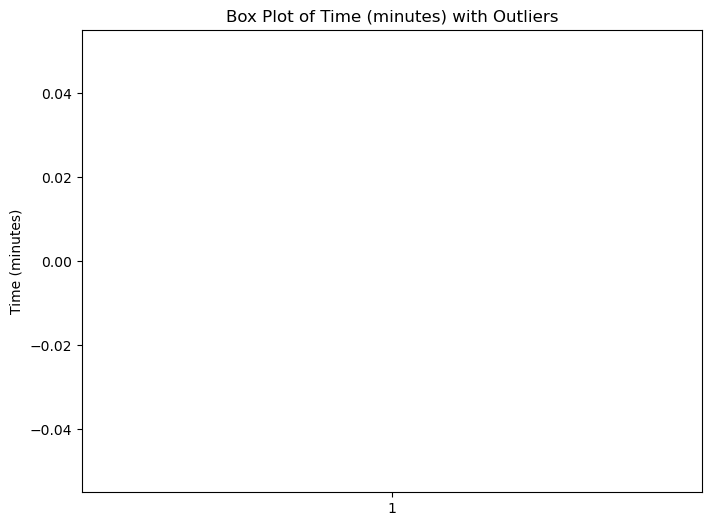

In [389]:

# Box plot to visualize outliers
plt.figure(figsize=(8, 6))
plt.boxplot(heineken_data["Time (minutes)"])
plt.title("Box Plot of Time (minutes) with Outliers")
plt.ylabel("Time (minutes)")
plt.show()

In [390]:
heineken_data[heineken_data["Time (minutes)"] ==0]

,Index,Time Logged,Date Logged,Shift,Incident,Machine,Area / Cause,Reason / Fault,Time (minutes),Comments,Line No,MachineStopType
15204,820251,1899-12-30 01:49:00.000,2022-03-23,Strongbow/Yellow,NONA,NaN,No customer demand,NaN,0.0,NaN,17,NaN
36153,908038,1899-12-30 11:25:00.000,2023-06-28,Strongbow/Yellow,Machine Stop,Conveyors: Empty can conveyors,VTU to air ioniser,Can jammed,0.0,all cans fallen over high level,17,Breakdown
39699,924690,1899-12-30 04:08:00.000,2023-09-24,Heineken/Orange,Machine Stop,Seamer,Discharge rail,Seamer crash,0.0,"Seamer jam,x3 seamer flush on.",17,Short Stop
57326,785458,1899-12-30 12:00:00.000,2021-09-24,Heineken/Orange,Machine Stop,Conveyors: Empty can conveyors,VTU to air ioniser,Can jammed,0.0,high level can jam under lid 14-15,18,Short Stop
60066,794542,1899-12-30 15:48:00.000,2021-11-09,John Smiths/Pink,Machine Stop,Conveyors: Empty can conveyors,VTU to air ioniser,Can jammed,0.0,NaN,18,Short Stop
64252,809102,1899-12-30 01:07:00.000,2022-01-21,Fosters/Green,Machine Stop,Conveyors: Empty can conveyors,VTU to air ioniser,Can jammed,0.0,lots of high level can jams,18,Breakdown
66906,817635,1899-12-30 10:40:00.000,2022-03-06,Fosters/Green,Machine Stop,Palletiser B,Pallet lift,Fault not listed,0.0,Issues with Empty Pallet Feed constantly going...,18,Breakdown
73130,842736,1899-12-30 03:26:00.000,2022-07-13,Strongbow/Yellow,Machine Stop,Seamer,Discharge rail,Seamer crash,0.0,seamer crash,18,Short Stop
73132,842737,1899-12-30 03:37:00.000,2022-07-13,Strongbow/Yellow,Machine Stop,Automatic lid feeder,Multi-feeder,Tubes stuck,0.0,paper tubes all wrapped around the roller and ...,18,Short Stop
87953,901894,1899-12-30 05:00:00.000,2023-05-28,Heineken/Orange,Machine Stop,Conveyors: Empty can conveyors,Communications error,PLC fault,0.0,"Conveyor tripped (M18,132)",18,Short Stop


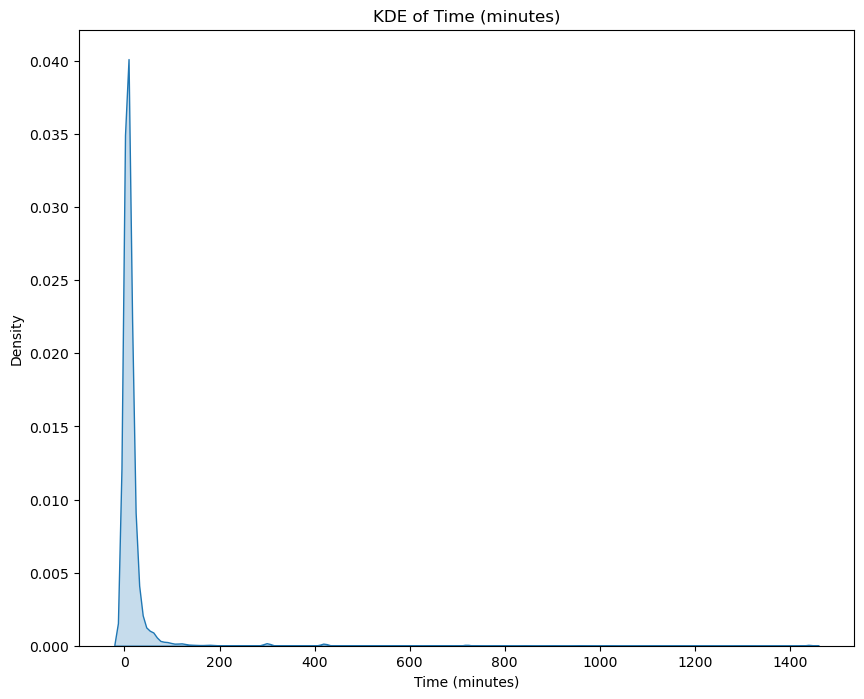

In [391]:
# Create the KDE plot
sns.kdeplot(heineken_data['Time (minutes)'], fill=True)  # 'fill=True' fills the area under the KDE curve

# Adding titles and labels
plt.title('KDE of Time (minutes)')
plt.xlabel('Time (minutes)')
plt.ylabel('Density')

# Show the plot
plt.show()

### think about how to change this graph to make it look better (transformations, preprocessing, normalisation? etc)

### Line Number

In [392]:
# this column describes which line the machine that has stopped belongs to


heineken_data["Line No"].value_counts()

Line No
18    56638
17    48482
Name: count, dtype: int64

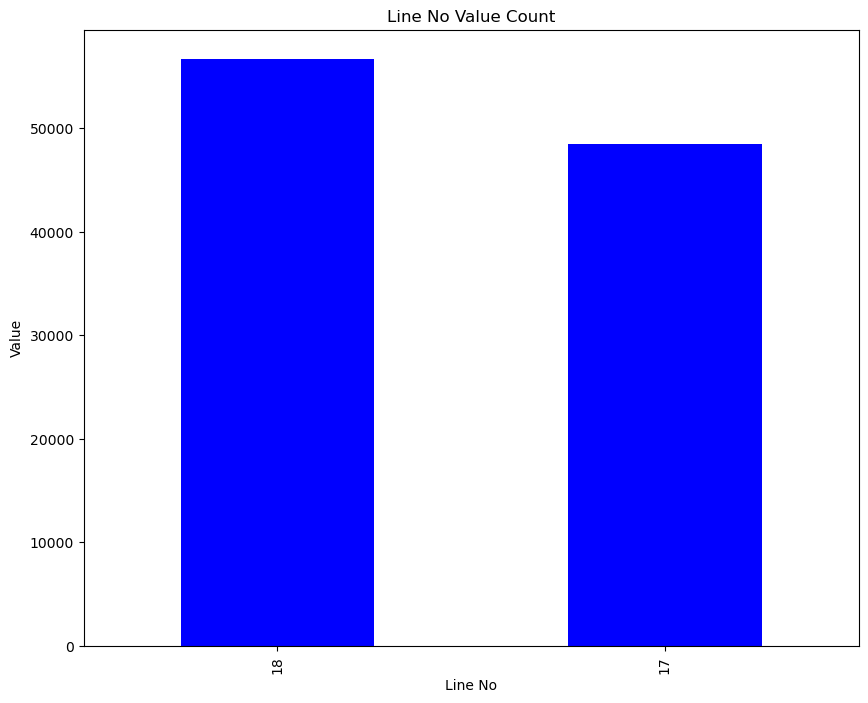

In [393]:
Machine_counts = heineken_data['Line No'].value_counts()

Machine_counts.plot(kind='bar', color='blue')

plt.title("Line No Value Count")
plt.xlabel("Line No")
plt.ylabel("Value")

plt.show()


### Machine stop type

In [394]:
heineken_data["MachineStopType"].describe()

count          96966
unique             2
top       Short Stop
freq           87389
Name: MachineStopType, dtype: object

In [395]:
heineken_data["MachineStopType"].value_counts()

MachineStopType
Short Stop    87389
Breakdown      9577
Name: count, dtype: int64

In [396]:

# Get value counts of each machine stop type
stop_type_counts = heineken_data["MachineStopType"].value_counts()

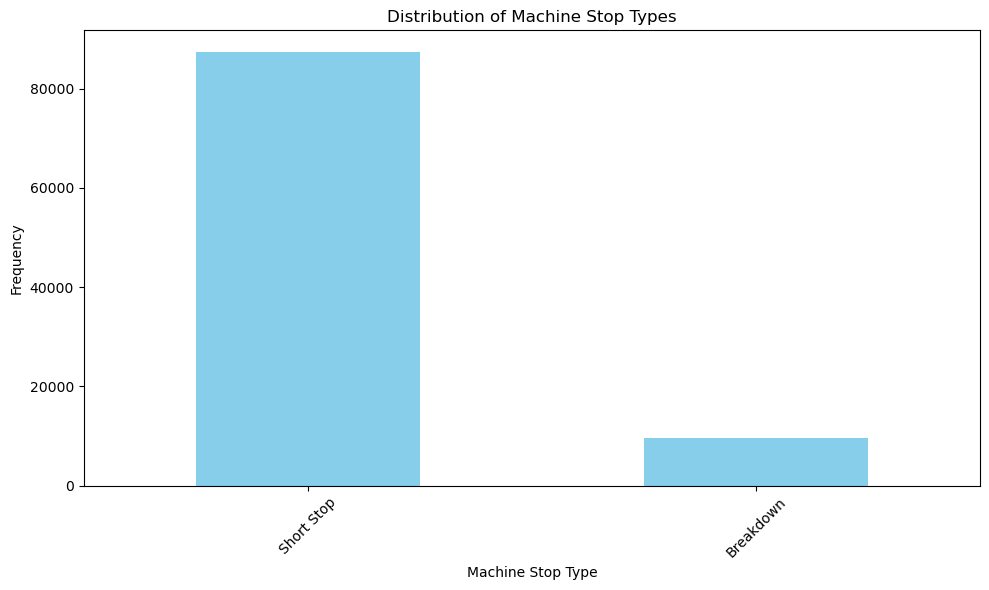

In [397]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
stop_type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Machine Stop Types')
plt.xlabel('Machine Stop Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

In [398]:
heineken_data[heineken_data["MachineStopType"] == "Short Stop" ]["Time (minutes)"].mean()

8.373028024763409

In [399]:
heineken_data[heineken_data["MachineStopType"] == "Breakdown" ]["Time (minutes)"].mean()

32.37224600605617

#### the code below shows that the machines short stop and breakdown is not due to the time the machine has stopped. Ask heineken what determines this instead?


In [400]:
heineken_data[(heineken_data["MachineStopType"] == "Breakdown") & (heineken_data["Time (minutes)"] < 30)]

,Index,Time Logged,Date Logged,Shift,Incident,Machine,Area / Cause,Reason / Fault,Time (minutes),Comments,Line No,MachineStopType
48,755432,1899-12-30 19:05:00.000,2021-04-30,Fosters/Green,Machine Stop,Tray and shrink-packer (TSP) B,Wrapping section,Shrink out of position,10.0,NaN,17,Breakdown
50,755441,1899-12-30 20:10:00.000,2021-04-30,Fosters/Green,Machine Stop,Automatic lid feeder,Lid-Feed High Level Chute (Seamer Infeed),Sensor Issue,7.0,NaN,17,Breakdown
51,755435,1899-12-30 20:20:00.000,2021-04-30,Fosters/Green,Machine Stop,Green Grip,can infeed,Gapping cans,9.0,NaN,17,Breakdown
57,755446,1899-12-30 21:40:00.000,2021-04-30,Fosters/Green,Machine Stop,Tosa 1: Full pallet wrapper B,Wrapper fault,Shrink snapped,19.0,NaN,17,Breakdown
58,755447,1899-12-30 22:03:00.000,2021-04-30,Fosters/Green,Machine Stop,Green Grip,carton pick and place,Pack crash at outfeed,17.0,NaN,17,Breakdown
...,...,...,...,...,...,...,...,...,...,...,...,...
105052,967180,1899-12-30 12:11:00.000,2024-04-28,John Smiths/Yellow,Machine Stop,Conveyors: Spaghetti junction to twist,Conveyors,Motor,5.0,One leg running cell 2 - motor not working,18,Breakdown
105053,967183,1899-12-30 12:21:00.000,2024-04-28,John Smiths/Yellow,Machine Stop,Conveyors: Spaghetti junction to twist,Conveyors,Motor,7.0,One leg running cell 2 - motor not working,18,Breakdown
105055,967195,1899-12-30 13:40:00.000,2024-04-28,Fosters/Green,Machine Stop,Conveyors: Spaghetti junction to twist,Conveyors,Motor,6.0,One leg running cell 2 - motor not working,18,Breakdown
105056,967199,1899-12-30 13:52:00.000,2024-04-28,Fosters/Green,Machine Stop,Conveyors: Spaghetti junction to twist,Conveyors,Motor,8.0,One leg running cell 2 - motor not working,18,Breakdown


In [401]:
heineken_data.columns

Index(['Index', 'Time Logged', 'Date Logged', 'Shift', 'Incident', 'Machine',
       'Area / Cause', 'Reason / Fault', 'Time (minutes)', 'Comments',
       'Line No', 'MachineStopType'],
      dtype='object')

# Preprocessing heineken dataset

## now I check the missing values and determine how to handle them

In [402]:
heineken_data.count()

Index              105120
Time Logged        105116
Date Logged        105120
Shift              105120
Incident           105120
Machine            100026
Area / Cause       103224
Reason / Fault      99823
Time (minutes)     105118
Comments            77784
Line No            105120
MachineStopType     96966
dtype: int64

### handling time logged missing values

In [403]:
## there are 4 rows that dont have a time logged, I check this in the following code and find out that its just a random error most likely rather than a reason caused by externalities. Therefore, I can just safely remove these rows. 

heineken_data[heineken_data["Time Logged"].isna()]

,Index,Time Logged,Date Logged,Shift,Incident,Machine,Area / Cause,Reason / Fault,Time (minutes),Comments,Line No,MachineStopType
18632,831333,NaN,2022-05-15,Strongbow/Yellow,Machine Stop,Seamer,Out-feed starwheel,Out of alignment,8.0,seamer jam,17,Short Stop
25967,859798,NaN,2022-10-15,Heineken/Orange,Machine Stop,Conveyors: Spaghetti junction to twist,Conveyors,Cans Fallen / jammed,18.0,Emptying bins with underfills from previous shift,17,Short Stop
82945,880416,NaN,2023-01-21,Fosters/Green,External Stop,External,Digital & Technology,IT infrastructure,50.0,After aligning data from sap and data capture ...,18,NaN
95723,929044,NaN,2023-10-19,Heineken/Orange,Machine Stop,Seamer,Discharge rail,Seamer crash,4.0,Normal seamer jam.,18,Short Stop


In [404]:
heineken_data = heineken_data[heineken_data['Time Logged'].notna()]

In [405]:
heineken_data.count()

Index              105116
Time Logged        105116
Date Logged        105116
Shift              105116
Incident           105116
Machine            100022
Area / Cause       103220
Reason / Fault      99819
Time (minutes)     105114
Comments            77780
Line No            105116
MachineStopType     96963
dtype: int64

In [406]:
# next , I check the nature of the missing values for machines as there are a few

In [407]:
heineken_data["Incident"].value_counts()

Incident
Machine Stop                96963
Planned Stop                 2037
Changeover                   1879
Speed loss                   1567
External Stop                1527
NONA                          639
Non Operator Maintenance      504
Name: count, dtype: int64

In [408]:
heineken_data[heineken_data["Machine"].isna()]

,Index,Time Logged,Date Logged,Shift,Incident,Machine,Area / Cause,Reason / Fault,Time (minutes),Comments,Line No,MachineStopType
120,755776,1899-12-30 13:35:00.000,2021-05-02,Heineken/Orange,Changeover,NaN,From: ****-Not in Production - **** and CN97-F...,To: ****-Not in Production - **** and CO55-KRO...,53.0,Quality change. Allowed more time for the RAMA...,17,NaN
129,755873,1899-12-30 02:00:00.000,2021-05-03,John Smiths/Pink,Non Operator Maintenance,NaN,Asset Care,NaN,300.0,NaN,17,NaN
130,755985,1899-12-30 07:00:00.000,2021-05-03,Heineken/Orange,Non Operator Maintenance,NaN,Asset Care,NaN,420.0,asset care,17,NaN
155,756111,1899-12-30 04:20:00.000,2021-05-04,John Smiths/Pink,Changeover,NaN,From: ****-Not in Production - **** and CO47-H...,To: ****-Not in Production - **** and CO46-HEI...,50.0,NaN,17,NaN
158,756133,1899-12-30 06:05:00.000,2021-05-04,John Smiths/Pink,Changeover,NaN,From: ****-Not in Production - **** and CO47-H...,To: ****-Not in Production - **** and CO46-HEI...,95.0,changeover cell 2,17,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
104973,966951,1899-12-30 10:00:00.000,2024-04-27,Fosters/Green,Planned Stop,NaN,Cleaning: Hygiene activity / seamer flush,NaN,55.0,Pitstop,18,NaN
104975,966960,1899-12-30 11:20:00.000,2024-04-27,Strongbow/Yellow,Changeover,NaN,From: CQ59-FOSTERS 440ML CAN 10PK and CQ59-FOS...,To: CQ61-FOSTERS 440ML CAN 18PK and CQ60-FOSTE...,50.0,change over,18,NaN
105023,967119,1899-12-30 06:01:00.000,2024-04-28,Heineken/Orange,Planned Stop,NaN,Cleaning: Hygiene activity / seamer flush,NaN,3.0,Seamer flush put on as due on process control ...,18,NaN
105088,967289,1899-12-30 22:35:00.000,2024-04-28,Strongbow/Yellow,Planned Stop,NaN,Cleaning: Hygiene activity / seamer flush,NaN,60.0,JB Filler stopped for end of week. Seamer flush,18,NaN


In [409]:
# all planned stops, changeovers , NONA, non-operative maintenance are where the machines are not displayed. Therefore, I cant just remove these values as it would remove the planned maintenance where all the machines are stopped. 

In [410]:
heineken_data[heineken_data["Machine"].isna()]["Incident"].value_counts()

Incident
Planned Stop                2037
Changeover                  1879
NONA                         639
Non Operator Maintenance     504
Machine Stop                  35
Name: count, dtype: int64

In [411]:
heineken_data["Incident"].unique()

array(['Machine Stop', 'Changeover', 'External Stop',
       'Non Operator Maintenance', 'Planned Stop', 'NONA', 'Speed loss'],
      dtype=object)

In [412]:
heineken_data[heineken_data["Incident"] == "External Stop"]

,Index,Time Logged,Date Logged,Shift,Incident,Machine,Area / Cause,Reason / Fault,Time (minutes),Comments,Line No,MachineStopType
127,756077,1899-12-30 00:00:00.000,2021-05-03,John Smiths/Pink,External Stop,Other,IT: Systems and/or automation,Other: Comment required,17.0,The 1:60 report is looking for 17mins of unacc...,17,NaN
200,756308,1899-12-30 00:27:00.000,2021-05-05,Heineken/Orange,External Stop,Quality,Material supplier defect,Other: Comment required,45.0,Card faulty not running through green grip,17,NaN
204,756339,1899-12-30 02:45:00.000,2021-05-05,Heineken/Orange,External Stop,Quality,Material supplier defect,Other: Comment required,28.0,Card faulty not running through green grip,17,NaN
291,756740,1899-12-30 21:51:00.000,2021-05-06,Strongbow/Yellow,External Stop,Brewing,Beer availability,Other: Comment required,26.0,MB DAW Beer supply not ready crafts working on...,17,NaN
292,756749,1899-12-30 22:29:00.000,2021-05-06,Strongbow/Yellow,External Stop,Brewing,Beer availability,Other: Comment required,49.0,MB DAW Beer supply not ready crafts working on...,17,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
104771,966300,1899-12-30 20:06:00.000,2024-04-24,John Smiths/Yellow,External Stop,Internal,Brewing Production,"Other, please comment",15.0,CO2 block valve tripped,18,NaN
104807,966420,1899-12-30 05:44:00.000,2024-04-25,John Smiths/Yellow,External Stop,Internal,Brewing Production,DO out of spec,19.0,DO2 alarm,18,NaN
104820,966467,1899-12-30 11:00:00.000,2024-04-25,Heineken/Orange,External Stop,Internal,Fire Alarm,Fire Alarm,34.0,Ammonia Leak,18,NaN
104823,966482,1899-12-30 12:35:00.000,2024-04-25,Heineken/Orange,External Stop,Internal,Fire Alarm,Fire Alarm,30.0,Brewery staff not allowed in brewery due to sm...,18,NaN


### inspect the time (minutes) columns

In [413]:
heineken_data[heineken_data["Time (minutes)"].isna()]

,Index,Time Logged,Date Logged,Shift,Incident,Machine,Area / Cause,Reason / Fault,Time (minutes),Comments,Line No,MachineStopType
57305,785430,1899-12-30 08:51:00.000,2021-09-24,Heineken/Orange,Machine Stop,Mead B,Can infeed section,Fault not listed,NaN,running on one leg due to target reached,18,Short Stop
59249,791674,1899-12-30 13:03:00.000,2021-10-25,Heineken/Orange,Machine Stop,Conveyors: Empty can conveyors,VTU to air ioniser,Can jammed,NaN,high level can jams fallen cans.,18,Short Stop


In [414]:
## it seems that its just random error rather than something bigger. Therefore, we can just safely remove it


heineken_data = heineken_data[heineken_data['Time (minutes)'].notna()]

In [415]:
heineken_data.count()

Index              105114
Time Logged        105114
Date Logged        105114
Shift              105114
Incident           105114
Machine            100020
Area / Cause       103218
Reason / Fault      99817
Time (minutes)     105114
Comments            77778
Line No            105114
MachineStopType     96961
dtype: int64

# check whether machine stop type is missing at random, missing completely ar random or missing not at random


### inspect the nature of machinestoptype, which is either short stop or breakdown


In [416]:
proportion_non_null = heineken_data['MachineStopType'].notna().mean()


In [417]:
# 92 percent of the values are not missing values

proportion_non_null

0.9224365926517876

In [418]:
## check if the missing values are missing at random, missing completely at random or missing not at random
# if its missing at random or missing completely at random , then just impute, but if missing not at random then have to conduct specific statistical techniques


In [419]:
heineken_data["MachineStopType"].value_counts()

MachineStopType
Short Stop    87384
Breakdown      9577
Name: count, dtype: int64

<Axes: >

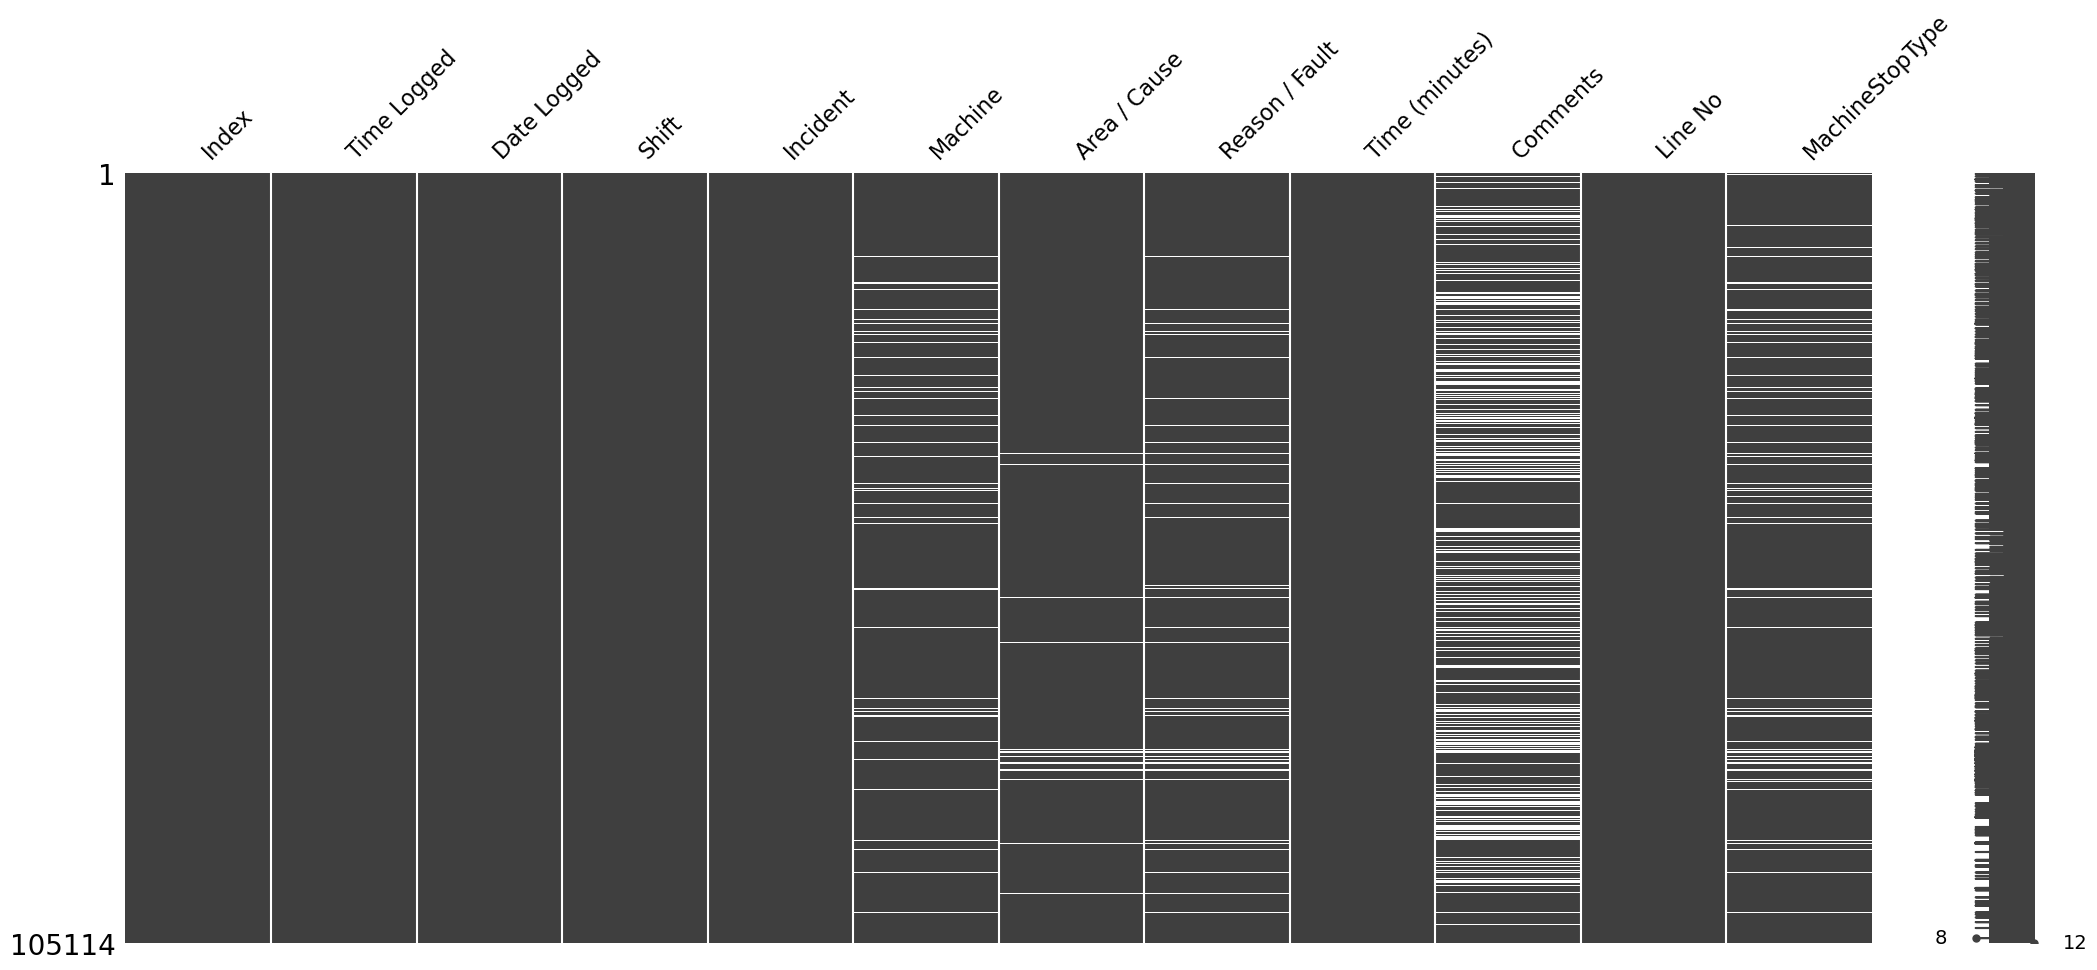

In [420]:
import missingno as msno

msno.matrix(heineken_data)

### chi squared test to test for missing completely at random

In [421]:
from scipy.stats import chi2_contingency

def chi_squared_test(heineken_data, target):
    for column in heineken_data.columns:
        if column != target and heineken_data[column].dtype == 'object':
            contingency_table = pd.crosstab(heineken_data[column], heineken_data[target].isnull())
            chi2, p, _, _ = chi2_contingency(contingency_table)
            print(f'Chi-squared test for {column} and {target}: p-value = {p}')

chi_squared_test(heineken_data, 'MachineStopType')


Chi-squared test for Time Logged and MachineStopType: p-value = 0.0
Chi-squared test for Shift and MachineStopType: p-value = 4.648267317385824e-05
Chi-squared test for Incident and MachineStopType: p-value = 0.0
Chi-squared test for Machine and MachineStopType: p-value = 0.0
Chi-squared test for Area / Cause and MachineStopType: p-value = 0.0
Chi-squared test for Reason / Fault and MachineStopType: p-value = 0.0
Chi-squared test for Comments and MachineStopType: p-value = 0.0


In [422]:
from scipy.stats import ttest_ind

def t_test(heineken_data, target):
    # Ensure the target column exists
    if target not in heineken_data.columns:
        print(f"Error: Column '{target}' does not exist in the DataFrame.")
        return

    # Select only numerical columns
    numerical_columns = heineken_data.select_dtypes(include=['int64', 'float64']).columns
    
    for column in numerical_columns:
        if column != target:
            group1 = heineken_data[heineken_data[target].isnull()][column].dropna()
            group2 = heineken_data[~heineken_data[target].isnull()][column].dropna()
            if len(group1) > 0 and len(group2) > 0:  # Ensure there are enough samples in both groups
                t_stat, p = ttest_ind(group1, group2, nan_policy='omit')
                print(f'T-test for {column} and {target}: p-value = {p}')
            else:
                print(f'Insufficient data for {column} and {target} to perform t-test.')

# Example usage:
# Assuming 'heineken_data' is your DataFrame and 'MachineStopType' is the target column
# t_test(heineken_data, 'MachineStopType')


In [423]:
t_test(heineken_data, 'MachineStopType')

T-test for Index and MachineStopType: p-value = 2.3266526223918444e-45
T-test for Time (minutes) and MachineStopType: p-value = 0.0
T-test for Line No and MachineStopType: p-value = 3.558622178093948e-05


# necessary preprocessing on the heineken dataset

In [424]:
heineken_data

,Index,Time Logged,Date Logged,Shift,Incident,Machine,Area / Cause,Reason / Fault,Time (minutes),Comments,Line No,MachineStopType
0,755238,1899-12-30 00:06:00.000,2021-04-30,Strongbow/Yellow,Machine Stop,Automatic lid feeder,Multi-feeder,Jammed Ends,6.0,MB Jammed ends in the rejector unit.,17,Short Stop
1,755242,1899-12-30 00:17:00.000,2021-04-30,Strongbow/Yellow,Machine Stop,Conveyors: Empty can conveyors,VTU to air ioniser,Can jammed,2.0,MB Can jammed on upper air conveyors.,17,Short Stop
2,755243,1899-12-30 00:21:00.000,2021-04-30,Strongbow/Yellow,Machine Stop,Green Grip,carton pick and place,Robot 1 - cards not placed correctly,10.0,MB Card head press out of alignment.,17,Short Stop
3,755250,1899-12-30 00:33:00.000,2021-04-30,Strongbow/Yellow,Machine Stop,Green Grip,carton pick and place,Robot 1 - cards not placed correctly,8.0,MB Card head press out of alignment.,17,Short Stop
4,755258,1899-12-30 00:45:00.000,2021-04-30,Strongbow/Yellow,Machine Stop,Green Grip,Diverter conveyor and outfeed,Pack crash at outfeed,27.0,MB Pack crashes on outfeed A and pickup issues...,17,Short Stop
...,...,...,...,...,...,...,...,...,...,...,...,...
105115,967373,1899-12-30 07:47:00.000,2024-04-29,Fosters/Green,Machine Stop,Conveyors: Empty can conveyors,Filler Infeed,Can jammed,3.0,Can jammed Lid 15 TD,18,Short Stop
105116,967376,1899-12-30 08:04:00.000,2024-04-29,Fosters/Green,Machine Stop,Conveyors: Empty can conveyors,VTU to air ioniser,Can jammed,3.0,Can jammed Lid 16 TD,18,Short Stop
105117,967379,1899-12-30 08:13:00.000,2024-04-29,Fosters/Green,Machine Stop,Seamer,Discharge rail,Seamer crash,6.0,damaged / gapping cans caused crash TD,18,Short Stop
105118,967381,1899-12-30 08:19:00.000,2024-04-29,Fosters/Green,Machine Stop,De-palletiser,Top frame removal assembly,Dropped top frame,10.0,Top frame snapped TD,18,Short Stop


## combine date and time to a single datetime column and then set this column as the index

In [425]:
heineken_data["Time Logged"] = heineken_data["Time Logged"].astype(str)

In [426]:
heineken_data["Time Logged"] = heineken_data["Time Logged"].str.replace("1899-12-30", "", regex=False)

In [427]:
# i realised that at position 37444, there was a wrongly formatted time logged format, so i had to clean that up

In [428]:
heineken_data.loc[37445]

Index                           913806
Time Logged               23:56:00.000
Date Logged        2023-07-29 00:00:00
Shift                  Heineken/Orange
Incident                  Machine Stop
Machine                         Seamer
Area / Cause            Discharge rail
Reason / Fault            Seamer crash
Time (minutes)                     6.0
Comments                           NaN
Line No                             17
MachineStopType             Short Stop
Name: 37445, dtype: object

In [429]:
heineken_data.loc[37446]

Index                           913933
Time Logged            12/1/1935 12:40
Date Logged        2023-07-30 00:00:00
Shift                 Strongbow/Yellow
Incident                          NONA
Machine                            NaN
Area / Cause        No customer demand
Reason / Fault                     NaN
Time (minutes)                   380.0
Comments              end of week plan
Line No                             17
MachineStopType                    NaN
Name: 37446, dtype: object

In [430]:
# Function to correct the date-time format
def correct_datetime_format(datetime_str):
    # Parse the datetime string
    datetime_obj = pd.to_datetime(datetime_str, format='%m/%d/%Y %H:%M')
    # Extract and format the time part
    corrected_time = datetime_obj.strftime('%H:%M:%S.%f')[:-3]
    return corrected_time

# Apply the function to the specific row
heineken_data.loc[heineken_data['Time Logged'] == '12/1/1935 12:40', 'Time Logged'] = heineken_data.loc[heineken_data['Time Logged'] == '12/1/1935 12:40', 'Time Logged'].apply(correct_datetime_format)

In [431]:
# Combine Date and Time into a single datetime column
heineken_data['DateTime'] = pd.to_datetime(heineken_data['Date Logged'].astype(str) + ' ' + heineken_data['Time Logged'].astype(str))

In [432]:
heineken_data.columns

Index(['Index', 'Time Logged', 'Date Logged', 'Shift', 'Incident', 'Machine',
       'Area / Cause', 'Reason / Fault', 'Time (minutes)', 'Comments',
       'Line No', 'MachineStopType', 'DateTime'],
      dtype='object')

In [433]:
heineken_data

,Index,Time Logged,Date Logged,Shift,Incident,Machine,Area / Cause,Reason / Fault,Time (minutes),Comments,Line No,MachineStopType,DateTime
0,755238,00:06:00.000,2021-04-30,Strongbow/Yellow,Machine Stop,Automatic lid feeder,Multi-feeder,Jammed Ends,6.0,MB Jammed ends in the rejector unit.,17,Short Stop,2021-04-30 00:06:00
1,755242,00:17:00.000,2021-04-30,Strongbow/Yellow,Machine Stop,Conveyors: Empty can conveyors,VTU to air ioniser,Can jammed,2.0,MB Can jammed on upper air conveyors.,17,Short Stop,2021-04-30 00:17:00
2,755243,00:21:00.000,2021-04-30,Strongbow/Yellow,Machine Stop,Green Grip,carton pick and place,Robot 1 - cards not placed correctly,10.0,MB Card head press out of alignment.,17,Short Stop,2021-04-30 00:21:00
3,755250,00:33:00.000,2021-04-30,Strongbow/Yellow,Machine Stop,Green Grip,carton pick and place,Robot 1 - cards not placed correctly,8.0,MB Card head press out of alignment.,17,Short Stop,2021-04-30 00:33:00
4,755258,00:45:00.000,2021-04-30,Strongbow/Yellow,Machine Stop,Green Grip,Diverter conveyor and outfeed,Pack crash at outfeed,27.0,MB Pack crashes on outfeed A and pickup issues...,17,Short Stop,2021-04-30 00:45:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105115,967373,07:47:00.000,2024-04-29,Fosters/Green,Machine Stop,Conveyors: Empty can conveyors,Filler Infeed,Can jammed,3.0,Can jammed Lid 15 TD,18,Short Stop,2024-04-29 07:47:00
105116,967376,08:04:00.000,2024-04-29,Fosters/Green,Machine Stop,Conveyors: Empty can conveyors,VTU to air ioniser,Can jammed,3.0,Can jammed Lid 16 TD,18,Short Stop,2024-04-29 08:04:00
105117,967379,08:13:00.000,2024-04-29,Fosters/Green,Machine Stop,Seamer,Discharge rail,Seamer crash,6.0,damaged / gapping cans caused crash TD,18,Short Stop,2024-04-29 08:13:00
105118,967381,08:19:00.000,2024-04-29,Fosters/Green,Machine Stop,De-palletiser,Top frame removal assembly,Dropped top frame,10.0,Top frame snapped TD,18,Short Stop,2024-04-29 08:19:00


In [434]:
# Set the combined datetime column as the index
heineken_data.set_index('DateTime', inplace=True)

# Optionally, you can drop the original Date and Time columns if they are no longer needed
heineken_data.drop(columns=['Date Logged', 'Time Logged'], inplace=True)

In [435]:
heineken_data.head()

,Index,Shift,Incident,Machine,Area / Cause,Reason / Fault,Time (minutes),Comments,Line No,MachineStopType
DateTime,,,,,,,,,,
2021-04-30 00:06:00,755238,Strongbow/Yellow,Machine Stop,Automatic lid feeder,Multi-feeder,Jammed Ends,6.0,MB Jammed ends in the rejector unit.,17,Short Stop
2021-04-30 00:17:00,755242,Strongbow/Yellow,Machine Stop,Conveyors: Empty can conveyors,VTU to air ioniser,Can jammed,2.0,MB Can jammed on upper air conveyors.,17,Short Stop
2021-04-30 00:21:00,755243,Strongbow/Yellow,Machine Stop,Green Grip,carton pick and place,Robot 1 - cards not placed correctly,10.0,MB Card head press out of alignment.,17,Short Stop
2021-04-30 00:33:00,755250,Strongbow/Yellow,Machine Stop,Green Grip,carton pick and place,Robot 1 - cards not placed correctly,8.0,MB Card head press out of alignment.,17,Short Stop
2021-04-30 00:45:00,755258,Strongbow/Yellow,Machine Stop,Green Grip,Diverter conveyor and outfeed,Pack crash at outfeed,27.0,MB Pack crashes on outfeed A and pickup issues...,17,Short Stop


In [436]:
heineken_data.count()

Index              105114
Shift              105114
Incident           105114
Machine            100020
Area / Cause       103218
Reason / Fault      99817
Time (minutes)     105114
Comments            77778
Line No            105114
MachineStopType     96961
dtype: int64

### remove index column

In [437]:
heineken_data = heineken_data.drop(columns = ["Index"])

In [438]:
heineken_data

,Shift,Incident,Machine,Area / Cause,Reason / Fault,Time (minutes),Comments,Line No,MachineStopType
DateTime,,,,,,,,,
2021-04-30 00:06:00,Strongbow/Yellow,Machine Stop,Automatic lid feeder,Multi-feeder,Jammed Ends,6.0,MB Jammed ends in the rejector unit.,17,Short Stop
2021-04-30 00:17:00,Strongbow/Yellow,Machine Stop,Conveyors: Empty can conveyors,VTU to air ioniser,Can jammed,2.0,MB Can jammed on upper air conveyors.,17,Short Stop
2021-04-30 00:21:00,Strongbow/Yellow,Machine Stop,Green Grip,carton pick and place,Robot 1 - cards not placed correctly,10.0,MB Card head press out of alignment.,17,Short Stop
2021-04-30 00:33:00,Strongbow/Yellow,Machine Stop,Green Grip,carton pick and place,Robot 1 - cards not placed correctly,8.0,MB Card head press out of alignment.,17,Short Stop
2021-04-30 00:45:00,Strongbow/Yellow,Machine Stop,Green Grip,Diverter conveyor and outfeed,Pack crash at outfeed,27.0,MB Pack crashes on outfeed A and pickup issues...,17,Short Stop
...,...,...,...,...,...,...,...,...,...
2024-04-29 07:47:00,Fosters/Green,Machine Stop,Conveyors: Empty can conveyors,Filler Infeed,Can jammed,3.0,Can jammed Lid 15 TD,18,Short Stop
2024-04-29 08:04:00,Fosters/Green,Machine Stop,Conveyors: Empty can conveyors,VTU to air ioniser,Can jammed,3.0,Can jammed Lid 16 TD,18,Short Stop
2024-04-29 08:13:00,Fosters/Green,Machine Stop,Seamer,Discharge rail,Seamer crash,6.0,damaged / gapping cans caused crash TD,18,Short Stop



## performing one hot encoding on Shift


In [439]:

# One-Hot Encoding
heineken_data = pd.get_dummies(heineken_data, columns=['Shift'])



In [440]:
heineken_data.head()

,Incident,Machine,Area / Cause,Reason / Fault,Time (minutes),Comments,Line No,MachineStopType,Shift_Fosters/Green,Shift_Heineken/Orange,Shift_John Smiths/Pink,Shift_John Smiths/Yellow,Shift_Strongbow/Yellow
DateTime,,,,,,,,,,,,,
2021-04-30 00:06:00,Machine Stop,Automatic lid feeder,Multi-feeder,Jammed Ends,6.0,MB Jammed ends in the rejector unit.,17,Short Stop,False,False,False,False,True
2021-04-30 00:17:00,Machine Stop,Conveyors: Empty can conveyors,VTU to air ioniser,Can jammed,2.0,MB Can jammed on upper air conveyors.,17,Short Stop,False,False,False,False,True
2021-04-30 00:21:00,Machine Stop,Green Grip,carton pick and place,Robot 1 - cards not placed correctly,10.0,MB Card head press out of alignment.,17,Short Stop,False,False,False,False,True
2021-04-30 00:33:00,Machine Stop,Green Grip,carton pick and place,Robot 1 - cards not placed correctly,8.0,MB Card head press out of alignment.,17,Short Stop,False,False,False,False,True
2021-04-30 00:45:00,Machine Stop,Green Grip,Diverter conveyor and outfeed,Pack crash at outfeed,27.0,MB Pack crashes on outfeed A and pickup issues...,17,Short Stop,False,False,False,False,True


In [441]:
heineken_data.count()

Incident                    105114
Machine                     100020
Area / Cause                103218
Reason / Fault               99817
Time (minutes)              105114
Comments                     77778
Line No                     105114
MachineStopType              96961
Shift_Fosters/Green         105114
Shift_Heineken/Orange       105114
Shift_John Smiths/Pink      105114
Shift_John Smiths/Yellow    105114
Shift_Strongbow/Yellow      105114
dtype: int64

In [442]:
heineken_data.head()

,Incident,Machine,Area / Cause,Reason / Fault,Time (minutes),Comments,Line No,MachineStopType,Shift_Fosters/Green,Shift_Heineken/Orange,Shift_John Smiths/Pink,Shift_John Smiths/Yellow,Shift_Strongbow/Yellow
DateTime,,,,,,,,,,,,,
2021-04-30 00:06:00,Machine Stop,Automatic lid feeder,Multi-feeder,Jammed Ends,6.0,MB Jammed ends in the rejector unit.,17,Short Stop,False,False,False,False,True
2021-04-30 00:17:00,Machine Stop,Conveyors: Empty can conveyors,VTU to air ioniser,Can jammed,2.0,MB Can jammed on upper air conveyors.,17,Short Stop,False,False,False,False,True
2021-04-30 00:21:00,Machine Stop,Green Grip,carton pick and place,Robot 1 - cards not placed correctly,10.0,MB Card head press out of alignment.,17,Short Stop,False,False,False,False,True
2021-04-30 00:33:00,Machine Stop,Green Grip,carton pick and place,Robot 1 - cards not placed correctly,8.0,MB Card head press out of alignment.,17,Short Stop,False,False,False,False,True
2021-04-30 00:45:00,Machine Stop,Green Grip,Diverter conveyor and outfeed,Pack crash at outfeed,27.0,MB Pack crashes on outfeed A and pickup issues...,17,Short Stop,False,False,False,False,True


In [443]:
heineken_data.dtypes

Incident                     object
Machine                      object
Area / Cause                 object
Reason / Fault               object
Time (minutes)              float64
Comments                     object
Line No                       int64
MachineStopType              object
Shift_Fosters/Green            bool
Shift_Heineken/Orange          bool
Shift_John Smiths/Pink         bool
Shift_John Smiths/Yellow       bool
Shift_Strongbow/Yellow         bool
dtype: object

In [444]:
heineken_data

,Incident,Machine,Area / Cause,Reason / Fault,Time (minutes),Comments,Line No,MachineStopType,Shift_Fosters/Green,Shift_Heineken/Orange,Shift_John Smiths/Pink,Shift_John Smiths/Yellow,Shift_Strongbow/Yellow
DateTime,,,,,,,,,,,,,
2021-04-30 00:06:00,Machine Stop,Automatic lid feeder,Multi-feeder,Jammed Ends,6.0,MB Jammed ends in the rejector unit.,17,Short Stop,False,False,False,False,True
2021-04-30 00:17:00,Machine Stop,Conveyors: Empty can conveyors,VTU to air ioniser,Can jammed,2.0,MB Can jammed on upper air conveyors.,17,Short Stop,False,False,False,False,True
2021-04-30 00:21:00,Machine Stop,Green Grip,carton pick and place,Robot 1 - cards not placed correctly,10.0,MB Card head press out of alignment.,17,Short Stop,False,False,False,False,True
2021-04-30 00:33:00,Machine Stop,Green Grip,carton pick and place,Robot 1 - cards not placed correctly,8.0,MB Card head press out of alignment.,17,Short Stop,False,False,False,False,True
2021-04-30 00:45:00,Machine Stop,Green Grip,Diverter conveyor and outfeed,Pack crash at outfeed,27.0,MB Pack crashes on outfeed A and pickup issues...,17,Short Stop,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-29 07:47:00,Machine Stop,Conveyors: Empty can conveyors,Filler Infeed,Can jammed,3.0,Can jammed Lid 15 TD,18,Short Stop,True,False,False,False,False
2024-04-29 08:04:00,Machine Stop,Conveyors: Empty can conveyors,VTU to air ioniser,Can jammed,3.0,Can jammed Lid 16 TD,18,Short Stop,True,False,False,False,False
2024-04-29 08:13:00,Machine Stop,Seamer,Discharge rail,Seamer crash,6.0,damaged / gapping cans caused crash TD,18,Short Stop,True,False,False,False,False


## creating seasonality features for time series analysis

In [445]:
heineken_data['Year'] = heineken_data.index.year
heineken_data['Month'] = heineken_data.index.month
heineken_data['Day'] = heineken_data.index.day
heineken_data['Hour'] = heineken_data.index.hour
heineken_data['DayOfWeek'] = heineken_data.index.dayofweek
heineken_data['IsWeekend'] = heineken_data['DayOfWeek'] >= 5

In [446]:
heineken_data

,Incident,Machine,Area / Cause,Reason / Fault,Time (minutes),Comments,Line No,MachineStopType,Shift_Fosters/Green,Shift_Heineken/Orange,Shift_John Smiths/Pink,Shift_John Smiths/Yellow,Shift_Strongbow/Yellow,Year,Month,Day,Hour,DayOfWeek,IsWeekend
DateTime,,,,,,,,,,,,,,,,,,,
2021-04-30 00:06:00,Machine Stop,Automatic lid feeder,Multi-feeder,Jammed Ends,6.0,MB Jammed ends in the rejector unit.,17,Short Stop,False,False,False,False,True,2021,4,30,0,4,False
2021-04-30 00:17:00,Machine Stop,Conveyors: Empty can conveyors,VTU to air ioniser,Can jammed,2.0,MB Can jammed on upper air conveyors.,17,Short Stop,False,False,False,False,True,2021,4,30,0,4,False
2021-04-30 00:21:00,Machine Stop,Green Grip,carton pick and place,Robot 1 - cards not placed correctly,10.0,MB Card head press out of alignment.,17,Short Stop,False,False,False,False,True,2021,4,30,0,4,False
2021-04-30 00:33:00,Machine Stop,Green Grip,carton pick and place,Robot 1 - cards not placed correctly,8.0,MB Card head press out of alignment.,17,Short Stop,False,False,False,False,True,2021,4,30,0,4,False
2021-04-30 00:45:00,Machine Stop,Green Grip,Diverter conveyor and outfeed,Pack crash at outfeed,27.0,MB Pack crashes on outfeed A and pickup issues...,17,Short Stop,False,False,False,False,True,2021,4,30,0,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-29 07:47:00,Machine Stop,Conveyors: Empty can conveyors,Filler Infeed,Can jammed,3.0,Can jammed Lid 15 TD,18,Short Stop,True,False,False,False,False,2024,4,29,7,0,False
2024-04-29 08:04:00,Machine Stop,Conveyors: Empty can conveyors,VTU to air ioniser,Can jammed,3.0,Can jammed Lid 16 TD,18,Short Stop,True,False,False,False,False,2024,4,29,8,0,False
2024-04-29 08:13:00,Machine Stop,Seamer,Discharge rail,Seamer crash,6.0,damaged / gapping cans caused crash TD,18,Short Stop,True,False,False,False,False,2024,4,29,8,0,False


# Preprocessing and conducting analysis on the machines separately


## exploratory data analysis specifically for depalletiser before separating them

In [447]:
# the main reason for this is as the machines behave differently, for example, the depalletiser data only has the incidents "speed loss" and "machine stop" but no external stop , therefore, having the depalletiser data get trained on data from "external stop"

heineken_data[heineken_data["Machine"] == "De-palletiser"]["Incident"].unique()

array(['Machine Stop', 'Speed loss'], dtype=object)

In [448]:
heineken_data.describe()

,Time (minutes),Line No,Year,Month,Day,Hour,DayOfWeek
count,105114.000000,105114.000000,105114.000000,105114.000000,105114.000000,105114.000000,105114.000000
mean,18.334037,17.538786,2022.249453,6.653329,15.796507,11.468891,3.128061
std,71.575370,0.498496,0.940507,3.364603,8.793666,7.124778,1.870355
min,0.000000,17.000000,2021.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,17.000000,2022.000000,4.000000,8.000000,5.000000,2.000000
50%,6.000000,18.000000,2022.000000,7.000000,16.000000,12.000000,3.000000
75%,12.000000,18.000000,2023.000000,10.000000,23.000000,18.000000,5.000000
max,1440.000000,18.000000,2024.000000,12.000000,31.000000,23.000000,6.000000


# creating the depalletiser dataset

In [449]:
depalletiser_data = heineken_data[heineken_data["Machine"] == "De-palletiser"]

In [450]:
depalletiser_data

,Incident,Machine,Area / Cause,Reason / Fault,Time (minutes),Comments,Line No,MachineStopType,Shift_Fosters/Green,Shift_Heineken/Orange,Shift_John Smiths/Pink,Shift_John Smiths/Yellow,Shift_Strongbow/Yellow,Year,Month,Day,Hour,DayOfWeek,IsWeekend
DateTime,,,,,,,,,,,,,,,,,,,
2021-05-01 03:35:00,Machine Stop,De-palletiser,Layer Sweep Assembly,Sensor mis-aligned,12.0,NaN,17,Breakdown,True,False,False,False,False,2021,5,1,3,5,True
2021-05-01 21:02:00,Machine Stop,De-palletiser,Top frame removal assembly,Dropped top frame,10.0,top frame snapped,17,Breakdown,True,False,False,False,False,2021,5,1,21,5,True
2021-05-02 18:30:00,Machine Stop,De-palletiser,Full Pallet lift,Fault not listed,23.0,Pallet jammed in lift,17,Short Stop,False,False,True,False,False,2021,5,2,18,6,True
2021-05-05 04:10:00,Machine Stop,De-palletiser,Top frame removal assembly,Dropped top frame,7.0,top frame dropped into lift. Entered to remove,17,Short Stop,False,True,False,False,False,2021,5,5,4,2,False
2021-05-06 01:52:00,Machine Stop,De-palletiser,Discharge Conveyors,Lightguard,5.0,pallet stack tripped lightgaurd,17,Short Stop,False,True,False,False,False,2021,5,6,1,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-22 06:10:00,Machine Stop,De-palletiser,Empty pallet conveyors,Light guard - debanding station,18.0,NaN,18,Short Stop,True,False,False,False,False,2024,4,22,6,0,False
2024-04-22 17:53:00,Machine Stop,De-palletiser,Top frame removal assembly,Dropped top frame,14.0,dropped top frame,18,Short Stop,False,False,False,True,False,2024,4,22,17,0,False
2024-04-27 21:29:00,Machine Stop,De-palletiser,Discharge Conveyors,Dropped layer pad,13.0,Layer cards fell behind pallet on lift. Machin...,18,Short Stop,False,True,False,False,False,2024,4,27,21,5,True


In [451]:
filler = heineken_data[heineken_data["Machine"] == "De-palletiser"]

In [452]:
depalletiser_data["MachineStopType"].value_counts()

MachineStopType
Short Stop    3308
Breakdown      617
Name: count, dtype: int64

# check for duplicates in the datetime column and remove them if there are any


In [453]:

# Check for duplicates in the index
duplicates = depalletiser_data.index.duplicated(keep=False)
print(f"Found {duplicates.sum()} duplicates")

# Display the duplicated values
duplicated_values = depalletiser_data[duplicates]
print("Duplicated values:")
print(duplicated_values)

# Remove duplicates, keeping the first occurrence
depalletiser_data = depalletiser_data[~depalletiser_data.index.duplicated(keep='first')]



Found 16 duplicates
Duplicated values:
                         Incident        Machine                Area / Cause  \
DateTime                                                                       
2021-07-24 02:17:00  Machine Stop  De-palletiser            Full Pallet lift   
2021-08-04 01:10:00  Machine Stop  De-palletiser      Empty pallet conveyors   
2021-11-05 03:48:00  Machine Stop  De-palletiser            Infeed Conveyors   
2022-04-19 19:43:00  Machine Stop  De-palletiser  Top frame removal assembly   
2022-06-04 02:00:00  Machine Stop  De-palletiser            Full Pallet lift   
2023-03-25 18:15:00  Machine Stop  De-palletiser  Top frame removal assembly   
2023-12-12 19:00:00  Machine Stop  De-palletiser          Layer pad take-off   
2021-07-08 15:53:00  Machine Stop  De-palletiser         Discharge Conveyors   
2021-07-08 15:53:00  Machine Stop  De-palletiser         Discharge Conveyors   
2021-07-24 02:17:00  Machine Stop  De-palletiser      Empty pallet conveyors   
2

# handling imbalanced dataset




In [454]:
depalletiser_data = depalletiser_data.reset_index()

In [455]:

x = depalletiser_data.drop(["Incident"], axis = 1)
y = depalletiser_data["Incident"]


<Axes: ylabel='count'>

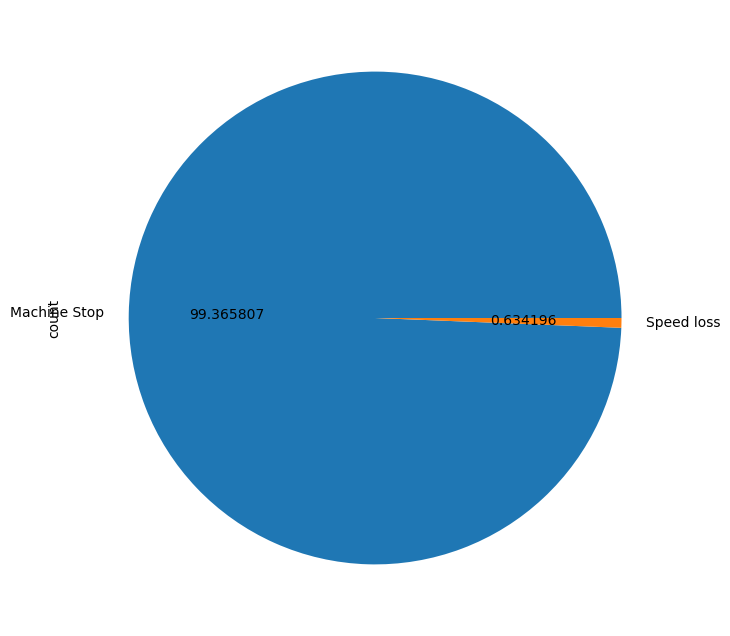

In [456]:
y.value_counts()
y.value_counts().plot.pie(autopct = "%2f")


In [457]:
### I was wondering if i should resample the dataset to handle the imbalances, however I realised that the class imbalance is too extreme and oversampling does not work 
## the main issue i ran into with oversampling is that speed loss was only a few instances towards the later dates of the dataset, however, by oversampling it caused the speed loss value to dominate the second half of the resampled dataset, therefore i decided it wasnt a good idea to resample
## the second best option is to just remove the speed loss rows. 

## this is just proof that i tried to resample, i can show the graph that the speed loss will dominate the second half of the dataset which is not good as...


### I decided to perform oversampling to handle class imbalance

In [458]:
from imblearn.over_sampling import RandomOverSampler

In [459]:
ros = RandomOverSampler(sampling_strategy="not majority")

In [460]:
x_res, y_res = ros.fit_resample(x, y)

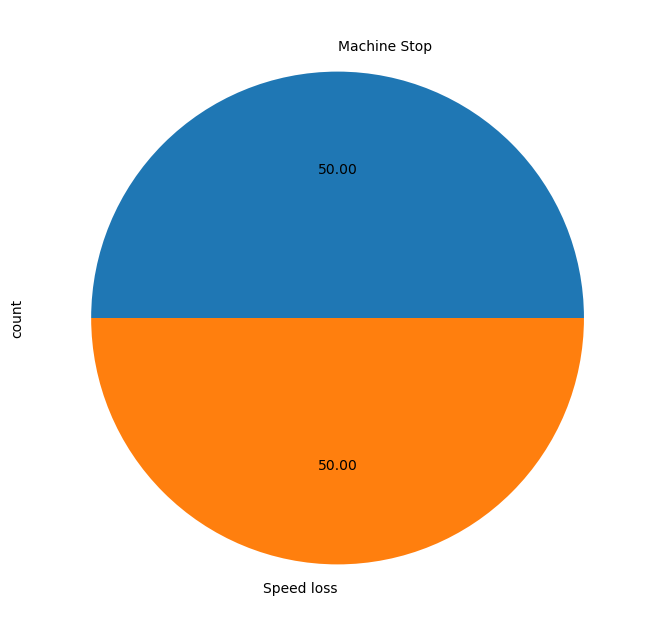

In [461]:
ax = y_res.value_counts().plot.pie(autopct = "%.2f")

In [462]:
_ = ax.set_title("Over-sampling")

In [463]:
depalletiser_data

,DateTime,Incident,Machine,Area / Cause,Reason / Fault,Time (minutes),Comments,Line No,MachineStopType,Shift_Fosters/Green,Shift_Heineken/Orange,Shift_John Smiths/Pink,Shift_John Smiths/Yellow,Shift_Strongbow/Yellow,Year,Month,Day,Hour,DayOfWeek,IsWeekend
0,2021-05-01 03:35:00,Machine Stop,De-palletiser,Layer Sweep Assembly,Sensor mis-aligned,12.0,NaN,17,Breakdown,True,False,False,False,False,2021,5,1,3,5,True
1,2021-05-01 21:02:00,Machine Stop,De-palletiser,Top frame removal assembly,Dropped top frame,10.0,top frame snapped,17,Breakdown,True,False,False,False,False,2021,5,1,21,5,True
2,2021-05-02 18:30:00,Machine Stop,De-palletiser,Full Pallet lift,Fault not listed,23.0,Pallet jammed in lift,17,Short Stop,False,False,True,False,False,2021,5,2,18,6,True
3,2021-05-05 04:10:00,Machine Stop,De-palletiser,Top frame removal assembly,Dropped top frame,7.0,top frame dropped into lift. Entered to remove,17,Short Stop,False,True,False,False,False,2021,5,5,4,2,False
4,2021-05-06 01:52:00,Machine Stop,De-palletiser,Discharge Conveyors,Lightguard,5.0,pallet stack tripped lightgaurd,17,Short Stop,False,True,False,False,False,2021,5,6,1,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3937,2024-04-22 06:10:00,Machine Stop,De-palletiser,Empty pallet conveyors,Light guard - debanding station,18.0,NaN,18,Short Stop,True,False,False,False,False,2024,4,22,6,0,False
3938,2024-04-22 17:53:00,Machine Stop,De-palletiser,Top frame removal assembly,Dropped top frame,14.0,dropped top frame,18,Short Stop,False,False,False,True,False,2024,4,22,17,0,False
3939,2024-04-27 21:29:00,Machine Stop,De-palletiser,Discharge Conveyors,Dropped layer pad,13.0,Layer cards fell behind pallet on lift. Machin...,18,Short Stop,False,True,False,False,False,2024,4,27,21,5,True
3940,2024-04-28 17:47:00,Machine Stop,De-palletiser,Full Pallet lift,Jammed pallet,9.0,pallet jam,18,Short Stop,True,False,False,False,False,2024,4,28,17,6,True


In [464]:
# code to check where the unique values appear in the incident


depalletiser_data["Incident"]

0       Machine Stop
1       Machine Stop
2       Machine Stop
3       Machine Stop
4       Machine Stop
            ...     
3937    Machine Stop
3938    Machine Stop
3939    Machine Stop
3940    Machine Stop
3941    Machine Stop
Name: Incident, Length: 3942, dtype: object

In [465]:
import pandas as pd

# Assuming df is your DataFrame and it's already loaded
# Count the occurrences of each incident type
incident_counts = depalletiser_data['Incident'].value_counts()

# Calculate proportions
total_incidents = len(depalletiser_data)
proportions = incident_counts / total_incidents

print("Incident Counts:\n", incident_counts)
print("\nProportions:\n", proportions)


Incident Counts:
 Incident
Machine Stop    3917
Speed loss        25
Name: count, dtype: int64

Proportions:
 Incident
Machine Stop    0.993658
Speed loss      0.006342
Name: count, dtype: float64


## resampled depalletiser dataset

In [466]:
x_res

,DateTime,Machine,Area / Cause,Reason / Fault,Time (minutes),Comments,Line No,MachineStopType,Shift_Fosters/Green,Shift_Heineken/Orange,Shift_John Smiths/Pink,Shift_John Smiths/Yellow,Shift_Strongbow/Yellow,Year,Month,Day,Hour,DayOfWeek,IsWeekend
0,2021-05-01 03:35:00,De-palletiser,Layer Sweep Assembly,Sensor mis-aligned,12.0,NaN,17,Breakdown,True,False,False,False,False,2021,5,1,3,5,True
1,2021-05-01 21:02:00,De-palletiser,Top frame removal assembly,Dropped top frame,10.0,top frame snapped,17,Breakdown,True,False,False,False,False,2021,5,1,21,5,True
2,2021-05-02 18:30:00,De-palletiser,Full Pallet lift,Fault not listed,23.0,Pallet jammed in lift,17,Short Stop,False,False,True,False,False,2021,5,2,18,6,True
3,2021-05-05 04:10:00,De-palletiser,Top frame removal assembly,Dropped top frame,7.0,top frame dropped into lift. Entered to remove,17,Short Stop,False,True,False,False,False,2021,5,5,4,2,False
4,2021-05-06 01:52:00,De-palletiser,Discharge Conveyors,Lightguard,5.0,pallet stack tripped lightgaurd,17,Short Stop,False,True,False,False,False,2021,5,6,1,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7829,2021-09-18 08:00:00,De-palletiser,NaN,NaN,3.0,running at 1400 to compensate depal not matchi...,18,NaN,False,False,False,False,True,2021,9,18,8,5,True
7830,2021-09-18 18:00:00,De-palletiser,NaN,NaN,4.0,running at 1400 to compensate depal not matchi...,18,NaN,False,False,False,False,True,2021,9,18,18,5,True
7831,2021-09-20 00:00:00,De-palletiser,NaN,NaN,4.0,running at 1400 to compensate depal not matchi...,18,NaN,False,False,False,False,True,2021,9,20,0,0,False
7832,2021-09-19 21:00:00,De-palletiser,NaN,NaN,4.0,running at 1400 to compensate depal not matchi...,18,NaN,False,False,False,False,True,2021,9,19,21,6,True


In [467]:
# Combine resampled features and target back into a DataFrame
df_resampled = pd.DataFrame(x_res, columns=["DateTime",
    'Incident', 'Machine', 'Area / Cause', 'Reason / Fault',
    'Time (minutes)', 'Comments', 'Line No', 'MachineStopType',
    'Shift_Fosters/Green', 'Shift_Heineken/Orange',
    'Shift_John Smiths/Pink', 'Shift_John Smiths/Yellow',
    'Shift_Strongbow/Yellow', 'Year', 'Month', 'Day', 'Hour', 'DayOfWeek',
    'IsWeekend'])

In [468]:

df_resampled['class'] = y_res

In [469]:
df_resampled.columns

Index(['DateTime', 'Incident', 'Machine', 'Area / Cause', 'Reason / Fault',
       'Time (minutes)', 'Comments', 'Line No', 'MachineStopType',
       'Shift_Fosters/Green', 'Shift_Heineken/Orange',
       'Shift_John Smiths/Pink', 'Shift_John Smiths/Yellow',
       'Shift_Strongbow/Yellow', 'Year', 'Month', 'Day', 'Hour', 'DayOfWeek',
       'IsWeekend', 'class'],
      dtype='object')

In [470]:
df_resampled["class"].head(3600)

0       Machine Stop
1       Machine Stop
2       Machine Stop
3       Machine Stop
4       Machine Stop
            ...     
3595    Machine Stop
3596    Machine Stop
3597    Machine Stop
3598    Machine Stop
3599    Machine Stop
Name: class, Length: 3600, dtype: object

In [471]:
df_resampled.head()

,DateTime,Incident,Machine,Area / Cause,Reason / Fault,Time (minutes),Comments,Line No,MachineStopType,Shift_Fosters/Green,...,Shift_John Smiths/Pink,Shift_John Smiths/Yellow,Shift_Strongbow/Yellow,Year,Month,Day,Hour,DayOfWeek,IsWeekend,class
0,2021-05-01 03:35:00,NaN,De-palletiser,Layer Sweep Assembly,Sensor mis-aligned,12.0,NaN,17,Breakdown,True,...,False,False,False,2021,5,1,3,5,True,Machine Stop
1,2021-05-01 21:02:00,NaN,De-palletiser,Top frame removal assembly,Dropped top frame,10.0,top frame snapped,17,Breakdown,True,...,False,False,False,2021,5,1,21,5,True,Machine Stop
2,2021-05-02 18:30:00,NaN,De-palletiser,Full Pallet lift,Fault not listed,23.0,Pallet jammed in lift,17,Short Stop,False,...,True,False,False,2021,5,2,18,6,True,Machine Stop
3,2021-05-05 04:10:00,NaN,De-palletiser,Top frame removal assembly,Dropped top frame,7.0,top frame dropped into lift. Entered to remove,17,Short Stop,False,...,False,False,False,2021,5,5,4,2,False,Machine Stop
4,2021-05-06 01:52:00,NaN,De-palletiser,Discharge Conveyors,Lightguard,5.0,pallet stack tripped lightgaurd,17,Short Stop,False,...,False,False,False,2021,5,6,1,3,False,Machine Stop


In [472]:
import pandas as pd

# Assuming df is your DataFrame and it's already loaded
# Count the occurrences of each incident type
incident_counts = df_resampled['class'].value_counts()

# Calculate proportions
total_incidents = len(df_resampled)
proportions = incident_counts / total_incidents

print("Incident Counts:\n", incident_counts)
print("\nProportions:\n", proportions)


Incident Counts:
 class
Machine Stop    3917
Speed loss      3917
Name: count, dtype: int64

Proportions:
 class
Machine Stop    0.5
Speed loss      0.5
Name: count, dtype: float64


In [473]:
# Splitting the dataframe into two halves
first_half = df_resampled.iloc[:len(df)//2]
second_half = df_resampled.iloc[len(df)//2:]

# Counting incidents in the first half
first_half_counts = first_half['class'].value_counts()

# Counting incidents in the second half
second_half_counts = second_half['class'].value_counts()

print("First Half Counts:\n", first_half_counts)
print("Second Half Counts:\n", second_half_counts)


First Half Counts:
 class
Machine Stop    30
Name: count, dtype: int64
Second Half Counts:
 class
Speed loss      3917
Machine Stop    3887
Name: count, dtype: int64


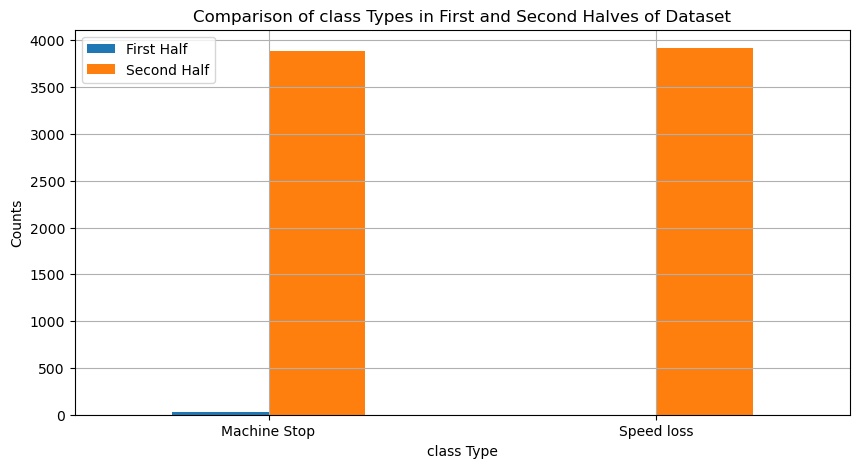

In [474]:
import matplotlib.pyplot as plt

# Data preparation for plotting
data_to_plot = {
    'First Half': first_half['class'].value_counts(),
    'Second Half': second_half['class'].value_counts()
}
plot_df = pd.DataFrame(data_to_plot)

# Plotting
plot_df.plot(kind='bar', figsize=(10, 5))
plt.title('Comparison of class Types in First and Second Halves of Dataset')
plt.xlabel('class Type')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


In [475]:
depalletiser_data["Incident"].value_counts()

Incident
Machine Stop    3917
Speed loss        25
Name: count, dtype: int64

# even though it would have been more helpful to have the occurences of speed loss and be able to predict it, i believe that by not having it the model can better predict the machine failures

#### remove the rows with speed loss

In [476]:
depalletiser_data = depalletiser_data[depalletiser_data["Incident"] != "Speed loss"]

In [477]:
depalletiser_data

,DateTime,Incident,Machine,Area / Cause,Reason / Fault,Time (minutes),Comments,Line No,MachineStopType,Shift_Fosters/Green,Shift_Heineken/Orange,Shift_John Smiths/Pink,Shift_John Smiths/Yellow,Shift_Strongbow/Yellow,Year,Month,Day,Hour,DayOfWeek,IsWeekend
0,2021-05-01 03:35:00,Machine Stop,De-palletiser,Layer Sweep Assembly,Sensor mis-aligned,12.0,NaN,17,Breakdown,True,False,False,False,False,2021,5,1,3,5,True
1,2021-05-01 21:02:00,Machine Stop,De-palletiser,Top frame removal assembly,Dropped top frame,10.0,top frame snapped,17,Breakdown,True,False,False,False,False,2021,5,1,21,5,True
2,2021-05-02 18:30:00,Machine Stop,De-palletiser,Full Pallet lift,Fault not listed,23.0,Pallet jammed in lift,17,Short Stop,False,False,True,False,False,2021,5,2,18,6,True
3,2021-05-05 04:10:00,Machine Stop,De-palletiser,Top frame removal assembly,Dropped top frame,7.0,top frame dropped into lift. Entered to remove,17,Short Stop,False,True,False,False,False,2021,5,5,4,2,False
4,2021-05-06 01:52:00,Machine Stop,De-palletiser,Discharge Conveyors,Lightguard,5.0,pallet stack tripped lightgaurd,17,Short Stop,False,True,False,False,False,2021,5,6,1,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3937,2024-04-22 06:10:00,Machine Stop,De-palletiser,Empty pallet conveyors,Light guard - debanding station,18.0,NaN,18,Short Stop,True,False,False,False,False,2024,4,22,6,0,False
3938,2024-04-22 17:53:00,Machine Stop,De-palletiser,Top frame removal assembly,Dropped top frame,14.0,dropped top frame,18,Short Stop,False,False,False,True,False,2024,4,22,17,0,False
3939,2024-04-27 21:29:00,Machine Stop,De-palletiser,Discharge Conveyors,Dropped layer pad,13.0,Layer cards fell behind pallet on lift. Machin...,18,Short Stop,False,True,False,False,False,2024,4,27,21,5,True
3940,2024-04-28 17:47:00,Machine Stop,De-palletiser,Full Pallet lift,Jammed pallet,9.0,pallet jam,18,Short Stop,True,False,False,False,False,2024,4,28,17,6,True


In [478]:
depalletiser_data

,DateTime,Incident,Machine,Area / Cause,Reason / Fault,Time (minutes),Comments,Line No,MachineStopType,Shift_Fosters/Green,Shift_Heineken/Orange,Shift_John Smiths/Pink,Shift_John Smiths/Yellow,Shift_Strongbow/Yellow,Year,Month,Day,Hour,DayOfWeek,IsWeekend
0,2021-05-01 03:35:00,Machine Stop,De-palletiser,Layer Sweep Assembly,Sensor mis-aligned,12.0,NaN,17,Breakdown,True,False,False,False,False,2021,5,1,3,5,True
1,2021-05-01 21:02:00,Machine Stop,De-palletiser,Top frame removal assembly,Dropped top frame,10.0,top frame snapped,17,Breakdown,True,False,False,False,False,2021,5,1,21,5,True
2,2021-05-02 18:30:00,Machine Stop,De-palletiser,Full Pallet lift,Fault not listed,23.0,Pallet jammed in lift,17,Short Stop,False,False,True,False,False,2021,5,2,18,6,True
3,2021-05-05 04:10:00,Machine Stop,De-palletiser,Top frame removal assembly,Dropped top frame,7.0,top frame dropped into lift. Entered to remove,17,Short Stop,False,True,False,False,False,2021,5,5,4,2,False
4,2021-05-06 01:52:00,Machine Stop,De-palletiser,Discharge Conveyors,Lightguard,5.0,pallet stack tripped lightgaurd,17,Short Stop,False,True,False,False,False,2021,5,6,1,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3937,2024-04-22 06:10:00,Machine Stop,De-palletiser,Empty pallet conveyors,Light guard - debanding station,18.0,NaN,18,Short Stop,True,False,False,False,False,2024,4,22,6,0,False
3938,2024-04-22 17:53:00,Machine Stop,De-palletiser,Top frame removal assembly,Dropped top frame,14.0,dropped top frame,18,Short Stop,False,False,False,True,False,2024,4,22,17,0,False
3939,2024-04-27 21:29:00,Machine Stop,De-palletiser,Discharge Conveyors,Dropped layer pad,13.0,Layer cards fell behind pallet on lift. Machin...,18,Short Stop,False,True,False,False,False,2024,4,27,21,5,True
3940,2024-04-28 17:47:00,Machine Stop,De-palletiser,Full Pallet lift,Jammed pallet,9.0,pallet jam,18,Short Stop,True,False,False,False,False,2024,4,28,17,6,True


# resample dataset so that it is in regular intervals, this way we have a target variable so that we can do a classification task

In [479]:
depalletiser_data

,DateTime,Incident,Machine,Area / Cause,Reason / Fault,Time (minutes),Comments,Line No,MachineStopType,Shift_Fosters/Green,Shift_Heineken/Orange,Shift_John Smiths/Pink,Shift_John Smiths/Yellow,Shift_Strongbow/Yellow,Year,Month,Day,Hour,DayOfWeek,IsWeekend
0,2021-05-01 03:35:00,Machine Stop,De-palletiser,Layer Sweep Assembly,Sensor mis-aligned,12.0,NaN,17,Breakdown,True,False,False,False,False,2021,5,1,3,5,True
1,2021-05-01 21:02:00,Machine Stop,De-palletiser,Top frame removal assembly,Dropped top frame,10.0,top frame snapped,17,Breakdown,True,False,False,False,False,2021,5,1,21,5,True
2,2021-05-02 18:30:00,Machine Stop,De-palletiser,Full Pallet lift,Fault not listed,23.0,Pallet jammed in lift,17,Short Stop,False,False,True,False,False,2021,5,2,18,6,True
3,2021-05-05 04:10:00,Machine Stop,De-palletiser,Top frame removal assembly,Dropped top frame,7.0,top frame dropped into lift. Entered to remove,17,Short Stop,False,True,False,False,False,2021,5,5,4,2,False
4,2021-05-06 01:52:00,Machine Stop,De-palletiser,Discharge Conveyors,Lightguard,5.0,pallet stack tripped lightgaurd,17,Short Stop,False,True,False,False,False,2021,5,6,1,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3937,2024-04-22 06:10:00,Machine Stop,De-palletiser,Empty pallet conveyors,Light guard - debanding station,18.0,NaN,18,Short Stop,True,False,False,False,False,2024,4,22,6,0,False
3938,2024-04-22 17:53:00,Machine Stop,De-palletiser,Top frame removal assembly,Dropped top frame,14.0,dropped top frame,18,Short Stop,False,False,False,True,False,2024,4,22,17,0,False
3939,2024-04-27 21:29:00,Machine Stop,De-palletiser,Discharge Conveyors,Dropped layer pad,13.0,Layer cards fell behind pallet on lift. Machin...,18,Short Stop,False,True,False,False,False,2024,4,27,21,5,True
3940,2024-04-28 17:47:00,Machine Stop,De-palletiser,Full Pallet lift,Jammed pallet,9.0,pallet jam,18,Short Stop,True,False,False,False,False,2024,4,28,17,6,True


In [480]:
# make sure that the index is a datetime index

depalletiser_data = depalletiser_data.set_index("DateTime")

In [481]:
# extrapolating the times for machinery condition


depalletiser_data =  depalletiser_data.resample('T').interpolate(method='time')

In [482]:
depalletiser_data

,Incident,Machine,Area / Cause,Reason / Fault,Time (minutes),Comments,Line No,MachineStopType,Shift_Fosters/Green,Shift_Heineken/Orange,Shift_John Smiths/Pink,Shift_John Smiths/Yellow,Shift_Strongbow/Yellow,Year,Month,Day,Hour,DayOfWeek,IsWeekend
DateTime,,,,,,,,,,,,,,,,,,,
2021-04-30 16:41:00,Machine Stop,De-palletiser,Layer pad take-off,Layerpad gripper failure,5.000000,NaN,18.0,Short Stop,False,False,True,False,False,2021.0,4.0,30.000000,16.000000,4.000000,False
2021-04-30 16:42:00,NaN,NaN,NaN,NaN,5.115385,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,2021.0,4.0,30.000000,16.012821,4.000000,NaN
2021-04-30 16:43:00,NaN,NaN,NaN,NaN,5.230769,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,2021.0,4.0,30.000000,16.025641,4.000000,NaN
2021-04-30 16:44:00,NaN,NaN,NaN,NaN,5.346154,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,2021.0,4.0,30.000000,16.038462,4.000000,NaN
2021-04-30 16:45:00,NaN,NaN,NaN,NaN,5.461538,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,2021.0,4.0,30.000000,16.051282,4.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-29 08:15:00,NaN,NaN,NaN,NaN,9.995413,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,2024.0,4.0,28.995413,8.041284,0.027523,NaN
2024-04-29 08:16:00,NaN,NaN,NaN,NaN,9.996560,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,2024.0,4.0,28.996560,8.030963,0.020642,NaN
2024-04-29 08:17:00,NaN,NaN,NaN,NaN,9.997706,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,2024.0,4.0,28.997706,8.020642,0.013761,NaN


In [483]:
# forward fill specific columns


# Columns to exclude from forward fill
exclude_columns = ['Incident', 'Area / Cause', "Reason / Fault", "Comments", "MachineStopType", "Time (minutes)"]

# Separate the columns to exclude
df_excluded = depalletiser_data[exclude_columns]

# Drop the excluded columns from the original DataFrame
df_included = depalletiser_data.drop(columns=exclude_columns)

# Forward fill the remaining columns
df_filled = df_included.ffill()

# Combine the forward-filled columns with the excluded columns
depalletiser_data_filled = pd.concat([df_filled, df_excluded], axis=1)

# Reorder columns to match the original DataFrame
depalletiser_data = depalletiser_data_filled[depalletiser_data.columns]

# Print the result
print(depalletiser_data)

                         Incident        Machine                Area / Cause  \
DateTime                                                                       
2021-04-30 16:41:00  Machine Stop  De-palletiser          Layer pad take-off   
2021-04-30 16:42:00           NaN  De-palletiser                         NaN   
2021-04-30 16:43:00           NaN  De-palletiser                         NaN   
2021-04-30 16:44:00           NaN  De-palletiser                         NaN   
2021-04-30 16:45:00           NaN  De-palletiser                         NaN   
...                           ...            ...                         ...   
2024-04-29 08:15:00           NaN  De-palletiser                         NaN   
2024-04-29 08:16:00           NaN  De-palletiser                         NaN   
2024-04-29 08:17:00           NaN  De-palletiser                         NaN   
2024-04-29 08:18:00           NaN  De-palletiser                         NaN   
2024-04-29 08:19:00  Machine Stop  De-pa

In [484]:
# instead of NaN, I want the machinestoptype and incident to show "no failure"

# Replace NaN values in a specific column
depalletiser_data['Incident'] = depalletiser_data['Incident'].fillna('no failure')

# Display the modified DataFrame
print("\nModified DataFrame:")
print(depalletiser_data)



Modified DataFrame:
                         Incident        Machine                Area / Cause  \
DateTime                                                                       
2021-04-30 16:41:00  Machine Stop  De-palletiser          Layer pad take-off   
2021-04-30 16:42:00    no failure  De-palletiser                         NaN   
2021-04-30 16:43:00    no failure  De-palletiser                         NaN   
2021-04-30 16:44:00    no failure  De-palletiser                         NaN   
2021-04-30 16:45:00    no failure  De-palletiser                         NaN   
...                           ...            ...                         ...   
2024-04-29 08:15:00    no failure  De-palletiser                         NaN   
2024-04-29 08:16:00    no failure  De-palletiser                         NaN   
2024-04-29 08:17:00    no failure  De-palletiser                         NaN   
2024-04-29 08:18:00    no failure  De-palletiser                         NaN   
2024-04-29 08:19:00

In [485]:
depalletiser_data.head()

,Incident,Machine,Area / Cause,Reason / Fault,Time (minutes),Comments,Line No,MachineStopType,Shift_Fosters/Green,Shift_Heineken/Orange,Shift_John Smiths/Pink,Shift_John Smiths/Yellow,Shift_Strongbow/Yellow,Year,Month,Day,Hour,DayOfWeek,IsWeekend
DateTime,,,,,,,,,,,,,,,,,,,
2021-04-30 16:41:00,Machine Stop,De-palletiser,Layer pad take-off,Layerpad gripper failure,5.000000,NaN,18.0,Short Stop,False,False,True,False,False,2021.0,4.0,30.0,16.000000,4.0,False
2021-04-30 16:42:00,no failure,De-palletiser,NaN,NaN,5.115385,NaN,18.0,NaN,False,False,True,False,False,2021.0,4.0,30.0,16.012821,4.0,False
2021-04-30 16:43:00,no failure,De-palletiser,NaN,NaN,5.230769,NaN,18.0,NaN,False,False,True,False,False,2021.0,4.0,30.0,16.025641,4.0,False
2021-04-30 16:44:00,no failure,De-palletiser,NaN,NaN,5.346154,NaN,18.0,NaN,False,False,True,False,False,2021.0,4.0,30.0,16.038462,4.0,False
2021-04-30 16:45:00,no failure,De-palletiser,NaN,NaN,5.461538,NaN,18.0,NaN,False,False,True,False,False,2021.0,4.0,30.0,16.051282,4.0,False


In [486]:
depalletiser_data["Incident"].value_counts()

Incident
no failure      1572382
Machine Stop       3917
Name: count, dtype: int64

In [487]:
    #logic: subtract the datetime where depalletiserdata["incident"] != "no failure" against the datetime of the previous depalletiserdata["incident"] != "no failure"


    # Assuming your DataFrame is already loaded as depalletiser_data_try

    # Ensure the index is datetime
    depalletiser_data.index = pd.to_datetime(depalletiser_data.index)

    # Create an empty list to store the time differences
    time_differences = []

    # Initialize a variable to keep track of the previous failure time
    previous_failure_time = None

    # Iterate through the DataFrame row by row
    for index, row in depalletiser_data.iterrows():
        if row['Incident'] != 'no failure':
            if previous_failure_time is not None:
                time_difference = (index - previous_failure_time).total_seconds() / 60  # Convert to minutes
                time_differences.append(time_difference)
            else:
                time_differences.append(None)  # First failure has no previous failure to compare
            previous_failure_time = index
        else:
            time_differences.append(None)  # No failure, so no time difference

    # Add the time differences to the DataFrame
    depalletiser_data['time_between_failure'] = time_differences

    # Display the DataFrame with 'time_between_failure' column
    print(depalletiser_data)

                         Incident        Machine                Area / Cause  \
DateTime                                                                       
2021-04-30 16:41:00  Machine Stop  De-palletiser          Layer pad take-off   
2021-04-30 16:42:00    no failure  De-palletiser                         NaN   
2021-04-30 16:43:00    no failure  De-palletiser                         NaN   
2021-04-30 16:44:00    no failure  De-palletiser                         NaN   
2021-04-30 16:45:00    no failure  De-palletiser                         NaN   
...                           ...            ...                         ...   
2024-04-29 08:15:00    no failure  De-palletiser                         NaN   
2024-04-29 08:16:00    no failure  De-palletiser                         NaN   
2024-04-29 08:17:00    no failure  De-palletiser                         NaN   
2024-04-29 08:18:00    no failure  De-palletiser                         NaN   
2024-04-29 08:19:00  Machine Stop  De-pa

#### handling the nan values for time between failures

In [488]:
depalletiser_data.count()

Incident                    1576299
Machine                     1576299
Area / Cause                   3916
Reason / Fault                 3914
Time (minutes)              1576299
Comments                       3136
Line No                     1576299
MachineStopType                3917
Shift_Fosters/Green         1576299
Shift_Heineken/Orange       1576299
Shift_John Smiths/Pink      1576299
Shift_John Smiths/Yellow    1576299
Shift_Strongbow/Yellow      1576299
Year                        1576299
Month                       1576299
Day                         1576299
Hour                        1576299
DayOfWeek                   1576299
IsWeekend                   1576299
time_between_failure           3916
dtype: int64

In [489]:
depalletiser_data['time_between_failure'].fillna(value=99999, inplace=True)

depalletiser_data

,Incident,Machine,Area / Cause,Reason / Fault,Time (minutes),Comments,Line No,MachineStopType,Shift_Fosters/Green,Shift_Heineken/Orange,Shift_John Smiths/Pink,Shift_John Smiths/Yellow,Shift_Strongbow/Yellow,Year,Month,Day,Hour,DayOfWeek,IsWeekend,time_between_failure
DateTime,,,,,,,,,,,,,,,,,,,,
2021-04-30 16:41:00,Machine Stop,De-palletiser,Layer pad take-off,Layerpad gripper failure,5.000000,NaN,18.0,Short Stop,False,False,True,False,False,2021.0,4.0,30.000000,16.000000,4.000000,False,99999.0
2021-04-30 16:42:00,no failure,De-palletiser,NaN,NaN,5.115385,NaN,18.0,NaN,False,False,True,False,False,2021.0,4.0,30.000000,16.012821,4.000000,False,99999.0
2021-04-30 16:43:00,no failure,De-palletiser,NaN,NaN,5.230769,NaN,18.0,NaN,False,False,True,False,False,2021.0,4.0,30.000000,16.025641,4.000000,False,99999.0
2021-04-30 16:44:00,no failure,De-palletiser,NaN,NaN,5.346154,NaN,18.0,NaN,False,False,True,False,False,2021.0,4.0,30.000000,16.038462,4.000000,False,99999.0
2021-04-30 16:45:00,no failure,De-palletiser,NaN,NaN,5.461538,NaN,18.0,NaN,False,False,True,False,False,2021.0,4.0,30.000000,16.051282,4.000000,False,99999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-29 08:15:00,no failure,De-palletiser,NaN,NaN,9.995413,NaN,18.0,NaN,True,False,False,False,False,2024.0,4.0,28.995413,8.041284,0.027523,True,99999.0
2024-04-29 08:16:00,no failure,De-palletiser,NaN,NaN,9.996560,NaN,18.0,NaN,True,False,False,False,False,2024.0,4.0,28.996560,8.030963,0.020642,True,99999.0
2024-04-29 08:17:00,no failure,De-palletiser,NaN,NaN,9.997706,NaN,18.0,NaN,True,False,False,False,False,2024.0,4.0,28.997706,8.020642,0.013761,True,99999.0


In [490]:

depalletiser_data[depalletiser_data["time_between_failure"].notna()]

,Incident,Machine,Area / Cause,Reason / Fault,Time (minutes),Comments,Line No,MachineStopType,Shift_Fosters/Green,Shift_Heineken/Orange,Shift_John Smiths/Pink,Shift_John Smiths/Yellow,Shift_Strongbow/Yellow,Year,Month,Day,Hour,DayOfWeek,IsWeekend,time_between_failure
DateTime,,,,,,,,,,,,,,,,,,,,
2021-04-30 16:41:00,Machine Stop,De-palletiser,Layer pad take-off,Layerpad gripper failure,5.000000,NaN,18.0,Short Stop,False,False,True,False,False,2021.0,4.0,30.000000,16.000000,4.000000,False,99999.0
2021-04-30 16:42:00,no failure,De-palletiser,NaN,NaN,5.115385,NaN,18.0,NaN,False,False,True,False,False,2021.0,4.0,30.000000,16.012821,4.000000,False,99999.0
2021-04-30 16:43:00,no failure,De-palletiser,NaN,NaN,5.230769,NaN,18.0,NaN,False,False,True,False,False,2021.0,4.0,30.000000,16.025641,4.000000,False,99999.0
2021-04-30 16:44:00,no failure,De-palletiser,NaN,NaN,5.346154,NaN,18.0,NaN,False,False,True,False,False,2021.0,4.0,30.000000,16.038462,4.000000,False,99999.0
2021-04-30 16:45:00,no failure,De-palletiser,NaN,NaN,5.461538,NaN,18.0,NaN,False,False,True,False,False,2021.0,4.0,30.000000,16.051282,4.000000,False,99999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-29 08:15:00,no failure,De-palletiser,NaN,NaN,9.995413,NaN,18.0,NaN,True,False,False,False,False,2024.0,4.0,28.995413,8.041284,0.027523,True,99999.0
2024-04-29 08:16:00,no failure,De-palletiser,NaN,NaN,9.996560,NaN,18.0,NaN,True,False,False,False,False,2024.0,4.0,28.996560,8.030963,0.020642,True,99999.0
2024-04-29 08:17:00,no failure,De-palletiser,NaN,NaN,9.997706,NaN,18.0,NaN,True,False,False,False,False,2024.0,4.0,28.997706,8.020642,0.013761,True,99999.0


In [491]:
depalletiser_data.count()

Incident                    1576299
Machine                     1576299
Area / Cause                   3916
Reason / Fault                 3914
Time (minutes)              1576299
Comments                       3136
Line No                     1576299
MachineStopType                3917
Shift_Fosters/Green         1576299
Shift_Heineken/Orange       1576299
Shift_John Smiths/Pink      1576299
Shift_John Smiths/Yellow    1576299
Shift_Strongbow/Yellow      1576299
Year                        1576299
Month                       1576299
Day                         1576299
Hour                        1576299
DayOfWeek                   1576299
IsWeekend                   1576299
time_between_failure        1576299
dtype: int64

In [492]:
### this dataset is heavily imbalanced, therefore i will resample it by oversampling
## justification for oversampling rather than undersampling: oversampling is better for lstm models, additionally, oversampling ensures that there are enough rows for processing

In [493]:
depalletiser_data = depalletiser_data.reset_index()



In [494]:

x = depalletiser_data.drop(["Incident"], axis = 1)
y = depalletiser_data["Incident"]


In [495]:
### I decided to perform oversampling to handle class imbalance
from imblearn.over_sampling import RandomOverSampler


In [496]:
ros = RandomOverSampler(sampling_strategy="not majority")


In [497]:
x_res, y_res = ros.fit_resample(x, y)


In [498]:
_ = ax.set_title("Over-sampling")


In [499]:
depalletiser_data

,DateTime,Incident,Machine,Area / Cause,Reason / Fault,Time (minutes),Comments,Line No,MachineStopType,Shift_Fosters/Green,...,Shift_John Smiths/Pink,Shift_John Smiths/Yellow,Shift_Strongbow/Yellow,Year,Month,Day,Hour,DayOfWeek,IsWeekend,time_between_failure
0,2021-04-30 16:41:00,Machine Stop,De-palletiser,Layer pad take-off,Layerpad gripper failure,5.000000,NaN,18.0,Short Stop,False,...,True,False,False,2021.0,4.0,30.000000,16.000000,4.000000,False,99999.0
1,2021-04-30 16:42:00,no failure,De-palletiser,NaN,NaN,5.115385,NaN,18.0,NaN,False,...,True,False,False,2021.0,4.0,30.000000,16.012821,4.000000,False,99999.0
2,2021-04-30 16:43:00,no failure,De-palletiser,NaN,NaN,5.230769,NaN,18.0,NaN,False,...,True,False,False,2021.0,4.0,30.000000,16.025641,4.000000,False,99999.0
3,2021-04-30 16:44:00,no failure,De-palletiser,NaN,NaN,5.346154,NaN,18.0,NaN,False,...,True,False,False,2021.0,4.0,30.000000,16.038462,4.000000,False,99999.0
4,2021-04-30 16:45:00,no failure,De-palletiser,NaN,NaN,5.461538,NaN,18.0,NaN,False,...,True,False,False,2021.0,4.0,30.000000,16.051282,4.000000,False,99999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576294,2024-04-29 08:15:00,no failure,De-palletiser,NaN,NaN,9.995413,NaN,18.0,NaN,True,...,False,False,False,2024.0,4.0,28.995413,8.041284,0.027523,True,99999.0
1576295,2024-04-29 08:16:00,no failure,De-palletiser,NaN,NaN,9.996560,NaN,18.0,NaN,True,...,False,False,False,2024.0,4.0,28.996560,8.030963,0.020642,True,99999.0
1576296,2024-04-29 08:17:00,no failure,De-palletiser,NaN,NaN,9.997706,NaN,18.0,NaN,True,...,False,False,False,2024.0,4.0,28.997706,8.020642,0.013761,True,99999.0
1576297,2024-04-29 08:18:00,no failure,De-palletiser,NaN,NaN,9.998853,NaN,18.0,NaN,True,...,False,False,False,2024.0,4.0,28.998853,8.010321,0.006881,True,99999.0


In [500]:
import pandas as pd

# Combine the resampled features and target into a new DataFrame
depalletiser_data = pd.concat([pd.DataFrame(x_res, columns=x.columns), pd.Series(y_res, name="Incident")], axis=1)

# Display the first few rows of the balanced dataset
print(depalletiser_data.head())


             DateTime        Machine        Area / Cause  \
0 2021-04-30 16:41:00  De-palletiser  Layer pad take-off   
1 2021-04-30 16:42:00  De-palletiser                 NaN   
2 2021-04-30 16:43:00  De-palletiser                 NaN   
3 2021-04-30 16:44:00  De-palletiser                 NaN   
4 2021-04-30 16:45:00  De-palletiser                 NaN   

             Reason / Fault  Time (minutes) Comments  Line No MachineStopType  \
0  Layerpad gripper failure        5.000000      NaN     18.0      Short Stop   
1                       NaN        5.115385      NaN     18.0             NaN   
2                       NaN        5.230769      NaN     18.0             NaN   
3                       NaN        5.346154      NaN     18.0             NaN   
4                       NaN        5.461538      NaN     18.0             NaN   

   Shift_Fosters/Green  Shift_Heineken/Orange  ...  Shift_John Smiths/Yellow  \
0                False                  False  ...                     F

In [501]:
depalletiser_data = depalletiser_data.set_index("DateTime")

In [502]:
depalletiser_data.tail()

,Machine,Area / Cause,Reason / Fault,Time (minutes),Comments,Line No,MachineStopType,Shift_Fosters/Green,Shift_Heineken/Orange,Shift_John Smiths/Pink,Shift_John Smiths/Yellow,Shift_Strongbow/Yellow,Year,Month,Day,Hour,DayOfWeek,IsWeekend,time_between_failure,Incident
DateTime,,,,,,,,,,,,,,,,,,,,
2023-04-15 01:43:00,De-palletiser,Layer pad take-off,Fault not listed,15.0,layercard lift jammed,17.0,Short Stop,False,False,True,False,False,2023.0,4.0,15.0,1.0,5.0,True,753.0,Machine Stop
2021-04-30 19:58:00,De-palletiser,Full Pallet lift,Jammed pallet,3.0,NaN,18.0,Short Stop,True,False,False,False,False,2021.0,4.0,30.0,19.0,4.0,False,29.0,Machine Stop
2023-03-30 04:28:00,De-palletiser,Full Pallet lift,Jammed pallet,9.0,pallet stuck discharging,18.0,Short Stop,False,False,True,False,False,2023.0,3.0,30.0,4.0,3.0,False,619.0,Machine Stop
2022-06-15 15:20:00,De-palletiser,Empty pallet stacker,Stack Jammed,7.0,NaN,17.0,Short Stop,False,True,False,False,False,2022.0,6.0,15.0,15.0,2.0,False,128.0,Machine Stop
2021-12-21 22:58:00,De-palletiser,Full Pallet lift,Sensor dirty/ misaligned,7.0,"Sensor fault, Operater stopped line, Cleaned s...",17.0,Short Stop,False,False,True,False,False,2021.0,12.0,21.0,22.0,1.0,False,118.0,Machine Stop


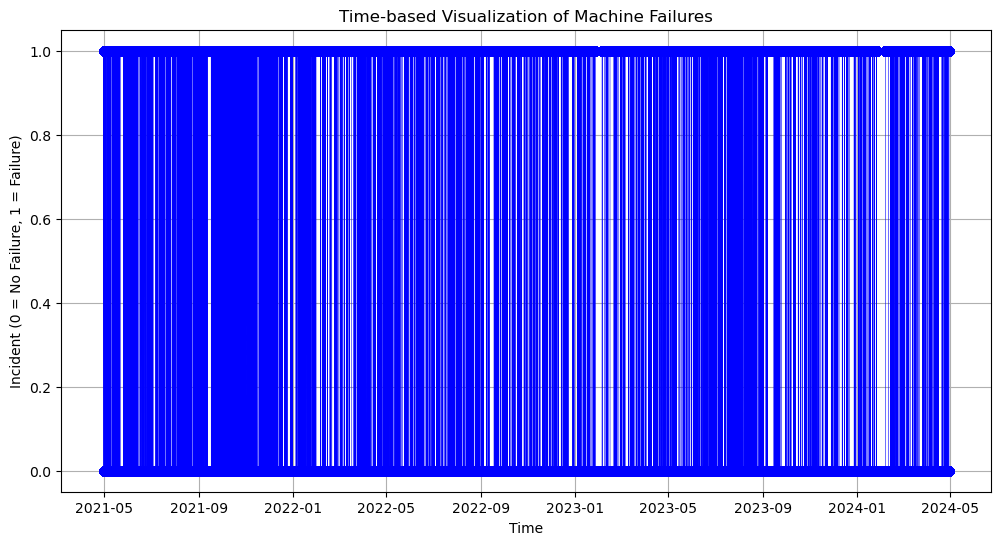

In [503]:

# Map the "Incident" values to 1 and 0
depalletiser_data['Incident'] = depalletiser_data['Incident'].map({'Machine Stop': 1, 'no failure': 0})

# Count the occurrences of each incident value
incident_counts = depalletiser_data["Incident"].value_counts()


# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(depalletiser_data.index, depalletiser_data['Incident'], marker='o', linestyle='-', color='b', linewidth=0.2)
plt.title('Time-based Visualization of Machine Failures')
plt.xlabel('Time')
plt.ylabel('Incident (0 = No Failure, 1 = Failure)')
plt.grid(True)
plt.show()

In [504]:
# based on this visualisation it looks fairly balanced with no "no failure" incidents that dominate a certain space

In [505]:
depalletiser_data.columns

Index(['Machine', 'Area / Cause', 'Reason / Fault', 'Time (minutes)',
       'Comments', 'Line No', 'MachineStopType', 'Shift_Fosters/Green',
       'Shift_Heineken/Orange', 'Shift_John Smiths/Pink',
       'Shift_John Smiths/Yellow', 'Shift_Strongbow/Yellow', 'Year', 'Month',
       'Day', 'Hour', 'DayOfWeek', 'IsWeekend', 'time_between_failure',
       'Incident'],
      dtype='object')

# creating the machine learning model

In [506]:
ml_model_data = depalletiser_data.drop(columns=['Machine', 'Area / Cause', 'Reason / Fault','Comments', 'MachineStopType',
       'Shift_Fosters/Green', 'Shift_Heineken/Orange',
       'Shift_John Smiths/Pink', 'Shift_John Smiths/Yellow',
       'Shift_Strongbow/Yellow'])

In [507]:
ml_model_data

,Time (minutes),Line No,Year,Month,Day,Hour,DayOfWeek,IsWeekend,time_between_failure,Incident
DateTime,,,,,,,,,,
2021-04-30 16:41:00,5.000000,18.0,2021.0,4.0,30.0,16.000000,4.0,False,99999.0,1
2021-04-30 16:42:00,5.115385,18.0,2021.0,4.0,30.0,16.012821,4.0,False,99999.0,0
2021-04-30 16:43:00,5.230769,18.0,2021.0,4.0,30.0,16.025641,4.0,False,99999.0,0
2021-04-30 16:44:00,5.346154,18.0,2021.0,4.0,30.0,16.038462,4.0,False,99999.0,0
2021-04-30 16:45:00,5.461538,18.0,2021.0,4.0,30.0,16.051282,4.0,False,99999.0,0
...,...,...,...,...,...,...,...,...,...,...
2023-04-15 01:43:00,15.000000,17.0,2023.0,4.0,15.0,1.000000,5.0,True,753.0,1
2021-04-30 19:58:00,3.000000,18.0,2021.0,4.0,30.0,19.000000,4.0,False,29.0,1
2023-03-30 04:28:00,9.000000,18.0,2023.0,3.0,30.0,4.000000,3.0,False,619.0,1


In [509]:
"""ml_model_data_try["Incident"].value_counts()"""

'ml_model_data_try["Incident"].value_counts()'

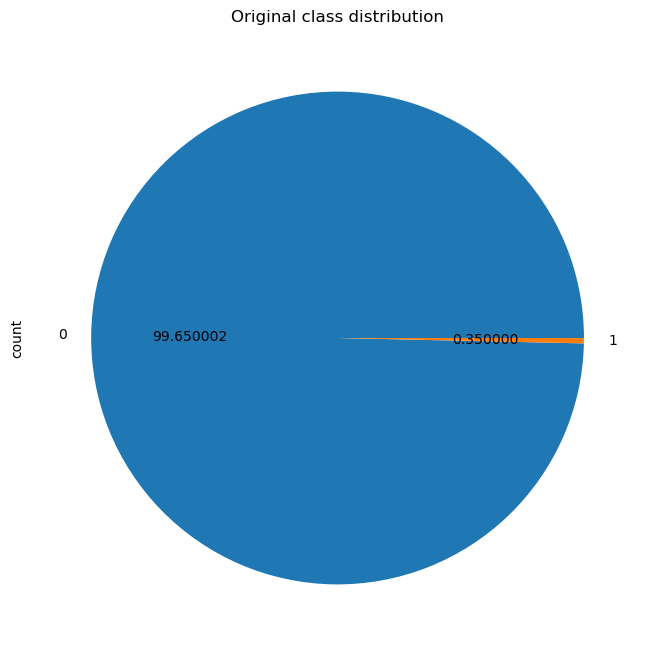

Cross-validated ROC AUC scores: [0.89383513 1.         0.99971326 1.         1.        ]
Mean ROC AUC score: 0.9787096774193549
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2990
           1       1.00      1.00      1.00        10

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000

ROC AUC Score: 1.0


In [510]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline

# Assuming depalletiser_data is your DataFrame and Incident is the target variable
ml_model_data = ml_model_data.reset_index()

# Separate features and target
x = ml_model_data.drop(["Incident"], axis=1)
y = ml_model_data["Incident"]

# Convert datetime columns to numerical features (e.g., timestamp)
for col in x.select_dtypes(include=['datetime64']).columns:
    x[col] = x[col].astype('int64') // 10**9  # Convert datetime to Unix timestamp (in seconds)

# If there are categorical variables, you need to encode them (e.g., using one-hot encoding)
x = pd.get_dummies(x, drop_first=True)

# Check the class distribution
y.value_counts().plot.pie(autopct="%2f")
plt.title("Original class distribution")
plt.show()

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

# Define the model with regularization parameters
clf = RandomForestClassifier(class_weight='balanced', 
                             max_depth=10, 
                             min_samples_split=10, 
                             min_samples_leaf=5, 
                             random_state=42)



# Define stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5)

# Evaluate the model using cross-validation
scores = cross_val_score(pipeline, x_train, y_train, cv=skf, scoring='roc_auc')

print(f'Cross-validated ROC AUC scores: {scores}')
print(f'Mean ROC AUC score: {scores.mean()}')

# Train the model on the entire training data
pipeline.fit(x_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(x_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))


53/53 [==============================] - 1s 1ms/step
Fold 1 Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1661
           1       0.10      1.00      0.19         5

    accuracy                           0.97      1666
   macro avg       0.55      0.99      0.59      1666
weighted avg       1.00      0.97      0.98      1666

53/53 [==============================] - 1s 1ms/step
Fold 2 Classification Report
              precision    recall  f1-score   support

           0       1.00      0.48      0.65      1662
           1       0.00      1.00      0.01         4

    accuracy                           0.48      1666
   macro avg       0.50      0.74      0.33      1666
weighted avg       1.00      0.48      0.64      1666

53/53 [==============================] - 1s 1ms/step
Fold 3 Classification Report
              precision    recall  f1-score   support

           0       1.00      0.77      0.87  

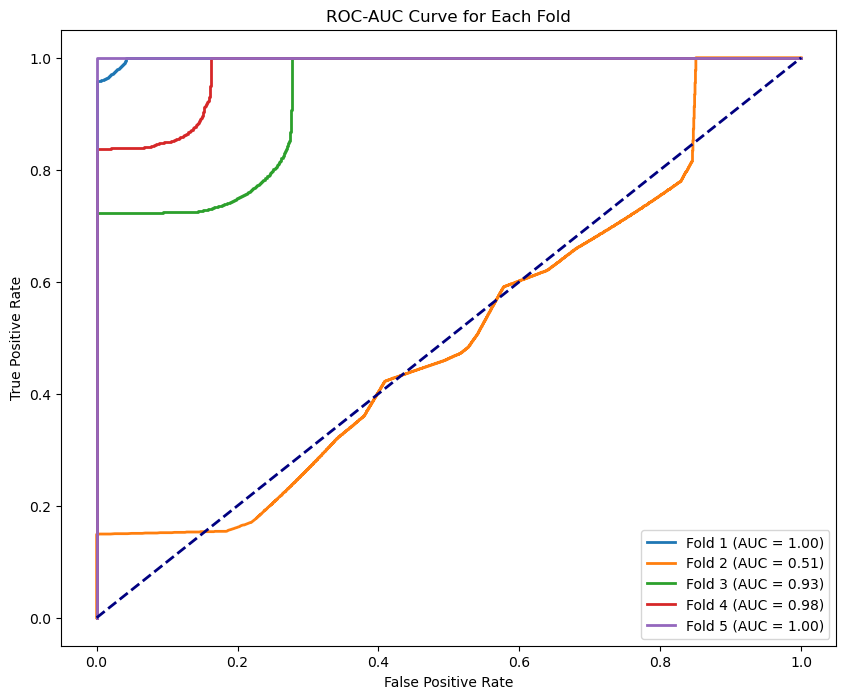

Average Accuracy Score: 0.8182472989195677
Average ROC AUC Score: 1.0


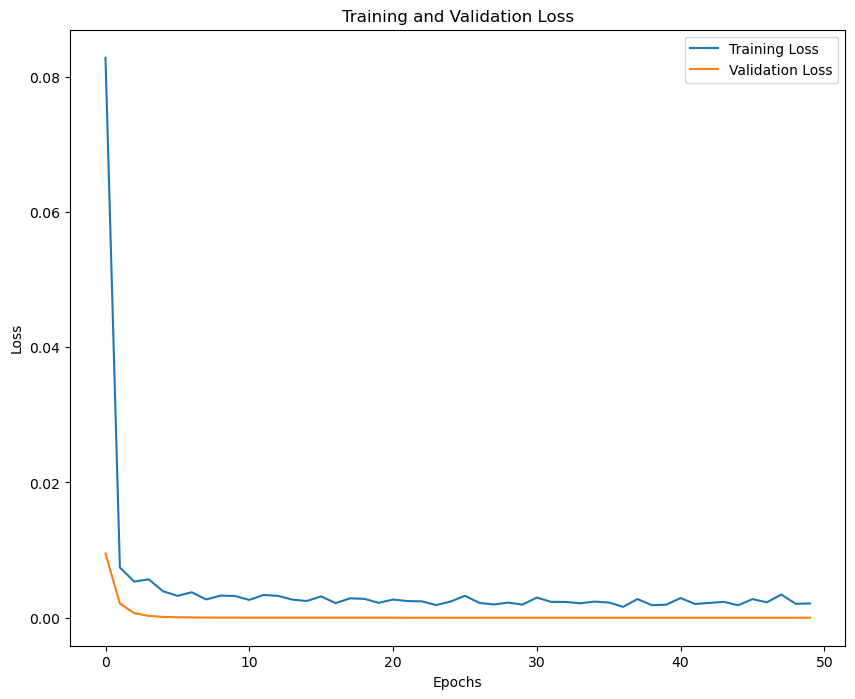

In [511]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Assuming ml_model_data is your DataFrame and Incident is the target variable
ml_model_data = ml_model_data.reset_index()

# Separate features and target
x = ml_model_data.drop(["Incident"], axis=1)
y = ml_model_data["Incident"]

# Convert datetime columns to numerical features (e.g., timestamp)
for col in x.select_dtypes(include=['datetime64']).columns:
    x[col] = x[col].astype('int64') // 10**9  # Convert datetime to Unix timestamp (in seconds)

# If there are categorical variables, you need to encode them (e.g., using one-hot encoding)
x = pd.get_dummies(x, drop_first=True)

# Fill missing values with 99999
x = x.fillna(99999)

# Scale the features
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Reshape data for LSTM [samples, timesteps, features]
x = x.reshape((x.shape[0], 1, x.shape[1]))

# Initialize Time Series Split cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Lists to store evaluation metrics
accuracy_scores = []
roc_auc_scores = []

# Time Series Cross-Validation loop
plt.figure(figsize=(10, 8))
for i, (train_index, test_index) in enumerate(tscv.split(x)):
    # Split the data into training and testing sets for the current fold
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Perform oversampling on the training set to handle class imbalance
    ros = RandomOverSampler(sampling_strategy="not majority")
    x_train_res, y_train_res = ros.fit_resample(x_train.reshape(x_train.shape[0], x_train.shape[2]), y_train)
    x_train_res = x_train_res.reshape((x_train_res.shape[0], 1, x_train_res.shape[1]))

    # Convert labels to categorical
    y_train_res = to_categorical(y_train_res)
    y_test = to_categorical(y_test)

    # Define the LSTM model
    model = Sequential()
    model.add(LSTM(100, input_shape=(x_train_res.shape[1], x_train_res.shape[2]), return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(100, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(y_train_res.shape[1], activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model with validation data
    history = model.fit(x_train_res, y_train_res, epochs=50, batch_size=64, validation_data=(x_test, y_test), verbose=0)

    # Evaluate the model on the test set
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)

    # Store evaluation metrics
    accuracy_scores.append(np.mean(y_pred_classes == y_test_classes))
    roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovr')
    roc_auc_scores.append(roc_auc)

    # Print classification report for each fold
    print(f"Fold {i+1} Classification Report")
    print(classification_report(y_test_classes, y_pred_classes))

    # Compute ROC curve and AUC for each fold
    fpr, tpr, _ = roc_curve(y_test.ravel(), y_pred.ravel())
    fold_roc_auc = auc(fpr, tpr)

    # Plot ROC curve for each fold
    plt.plot(fpr, tpr, lw=2, label=f'Fold {i+1} (AUC = {fold_roc_auc:.2f})')

# Plot average ROC curve
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for Each Fold')
plt.legend(loc="lower right")
plt.show()

# Print average evaluation metrics
print(f"Average Accuracy Score: {np.mean(accuracy_scores)}")
print(f"Average ROC AUC Score: {np.mean(roc_auc_scores)}")

# Plot the training and validation loss for the last fold
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


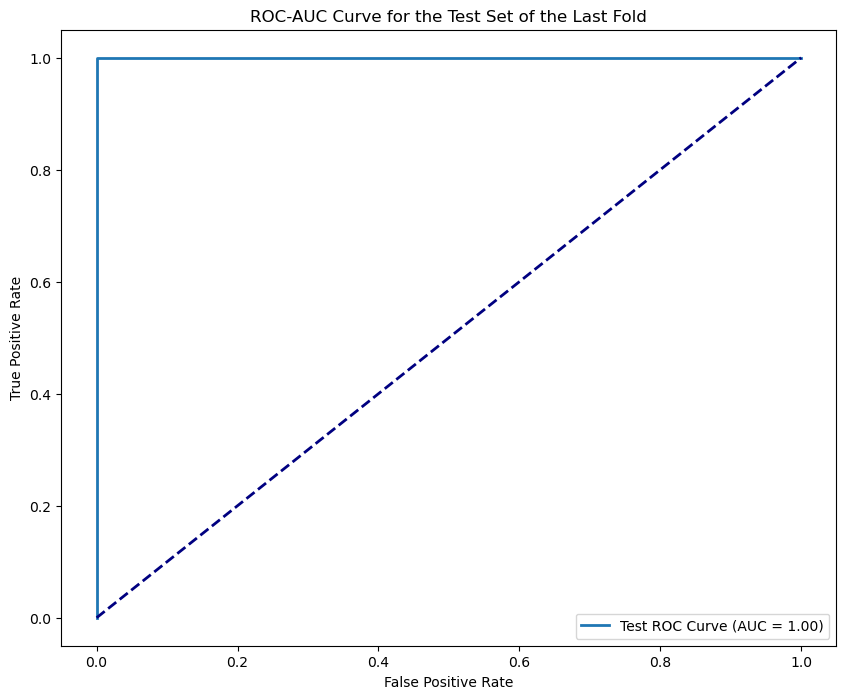

In [512]:
# Plot the ROC curve for the last fold only
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, lw=2, label=f'Test ROC Curve (AUC = {fold_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for the Test Set of the Last Fold')
plt.legend(loc="lower right")
plt.show()

# using a random forest classifier

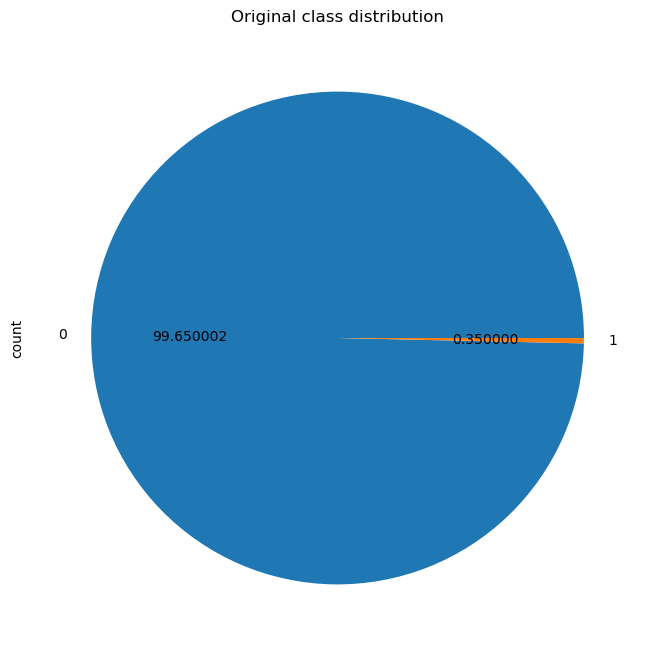

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2990
           1       1.00      1.00      1.00        10

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000

ROC AUC Score: 1.0


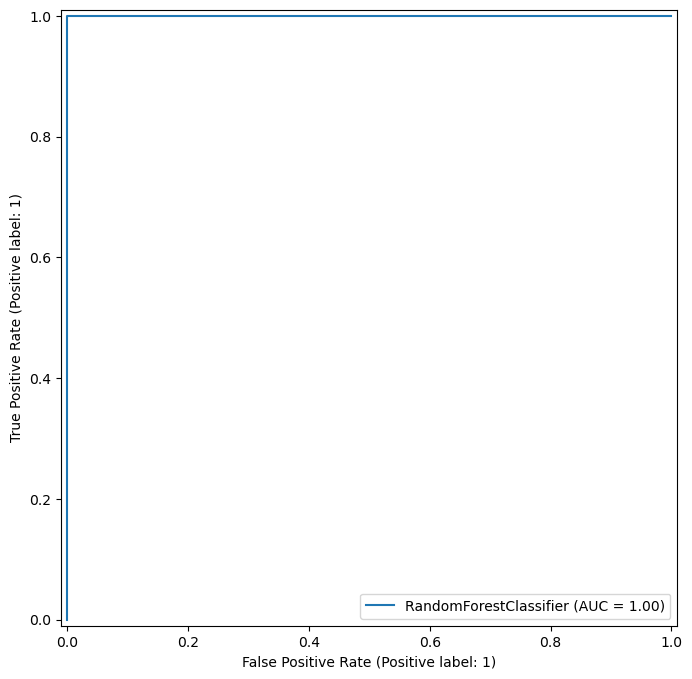

In [513]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler

# Assuming ml_model_data is your DataFrame and Incident is the target variable
ml_model_data = ml_model_data.reset_index()

# Separate features and target
x = ml_model_data.drop(["Incident"], axis=1)
y = ml_model_data["Incident"]

# Convert datetime columns to numerical features (e.g., timestamp)
for col in x.select_dtypes(include=['datetime64']).columns:
    x[col] = x[col].astype('int64') // 10**9  # Convert datetime to Unix timestamp (in seconds)

# If there are categorical variables, you need to encode them (e.g., using one-hot encoding)
x = pd.get_dummies(x, drop_first=True)

# Fill missing values with 99999
x = x.fillna(99999)

# Scale the features
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Check the class distribution
y.value_counts().plot.pie(autopct="%2f")
plt.title("Original class distribution")
plt.show()

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

# Perform oversampling on the training set to handle class imbalance
ros = RandomOverSampler(sampling_strategy="not majority")
x_train_res, y_train_res = ros.fit_resample(x_train, y_train)

# Define the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(x_train_res, y_train_res)

# Predict on the test set
y_pred = rf_model.predict(x_test)
y_pred_proba = rf_model.predict_proba(x_test)[:, 1]

# Print evaluation metrics
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Plot the ROC curve
RocCurveDisplay.from_estimator(rf_model, x_test, y_test)
plt.show()


In [514]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler

# Assuming ml_model_data is your DataFrame and Incident is the target variable
ml_model_data = ml_model_data.reset_index()

# Separate features and target
x = ml_model_data.drop(["Incident"], axis=1)
y = ml_model_data["Incident"]

# Convert datetime columns to numerical features (e.g., timestamp)
for col in x.select_dtypes(include=['datetime64']).columns:
    x[col] = x[col].astype('int64') // 10**9  # Convert datetime to Unix timestamp (in seconds)

# If there are categorical variables, you need to encode them (e.g., using one-hot encoding)
x = pd.get_dummies(x, drop_first=True)

# Save feature names before scaling
feature_names = x.columns

# Fill missing values with 99999
x = x.fillna(99999)

# Scale the features
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Check the class distribution
y.value_counts().plot.pie(autopct="%2f")
plt.title("Original class distribution")
plt.show()

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

# Perform oversampling on the training set to handle class imbalance
ros = RandomOverSampler(sampling_strategy="not majority")
x_train_res, y_train_res = ros.fit_resample(x_train, y_train)

# Define the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(x_train_res, y_train_res)

# Predict on the test set
y_pred = rf_model.predict(x_test)
y_pred_proba = rf_model.predict_proba(x_test)[:, 1]

# Print evaluation metrics
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Plot the ROC curve
RocCurveDisplay.from_estimator(rf_model, x_test, y_test)
plt.show()

# Feature Importance Plot
# Extract feature importances from the model
feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.show()


ValueError: cannot insert level_0, already exists